In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from arch import arch_model

In [2]:
stock = yf.Ticker("XRP-USD") #XRP-USD
data = stock.history(period="3mo", interval="1d")
data = data.dropna()
data = data[["Close"]]
print(data[["Close"]])
train_size = int(len(data) * 0.85)
train = data[:train_size]
test = data[train_size:]

                              Close
Date                               
2023-08-05 00:00:00+00:00  0.628423
2023-08-06 00:00:00+00:00  0.623087
2023-08-07 00:00:00+00:00  0.621931
2023-08-08 00:00:00+00:00  0.642406
2023-08-09 00:00:00+00:00  0.643365
...                             ...
2023-11-01 00:00:00+00:00  0.609538
2023-11-02 00:00:00+00:00  0.606439
2023-11-03 00:00:00+00:00  0.613002
2023-11-04 00:00:00+00:00  0.616184
2023-11-05 00:00:00+00:00  0.644982

[93 rows x 1 columns]


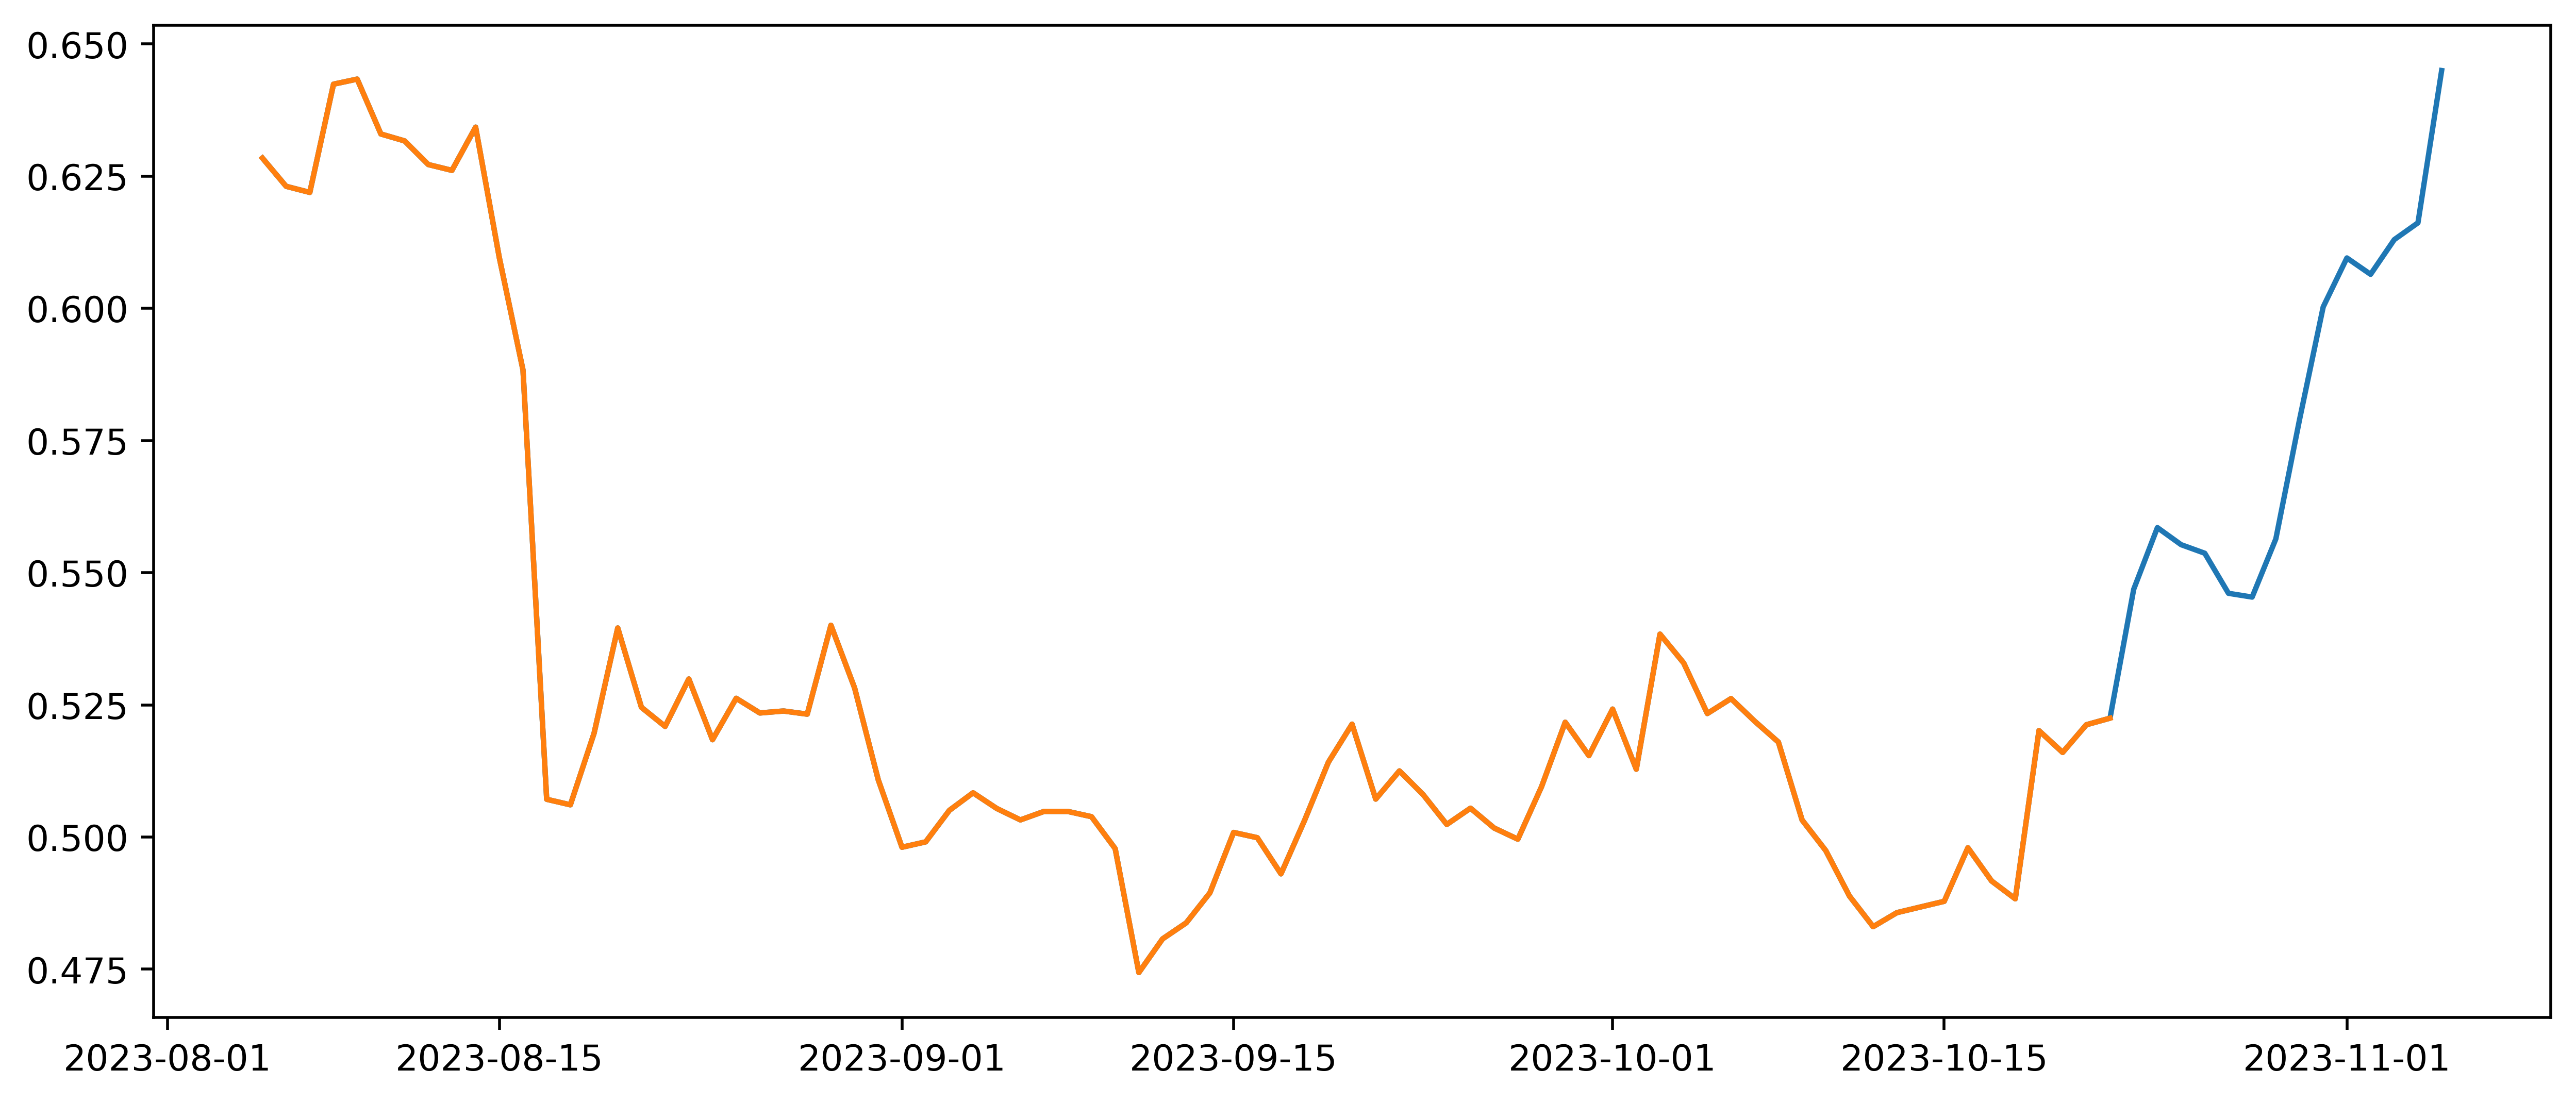

In [3]:
plt.figure(figsize=(12,5), dpi=500)
plt.plot(data[["Close"]])
plt.plot(train)


In [4]:
# data_log = np.log1p(data[['Close']])
# plt.figure(figsize=(12,5), dpi=500)
# plt.plot(data_log)


In [5]:
# train_size = int(len(data_log) * 0.8)
# train = data_log[:train_size]
# test = data_log[train_size:]


In [6]:
# print(data_log)
data_log_diff = data
#print(data_log_diff)
data_log_diff.reset_index(level=0, inplace=True, drop=True)
print(data_log_diff)



       Close
0   0.628423
1   0.623087
2   0.621931
3   0.642406
4   0.643365
..       ...
88  0.609538
89  0.606439
90  0.613002
91  0.616184
92  0.644982

[93 rows x 1 columns]


Text(0.5, 1.0, '7th Order Differencing')

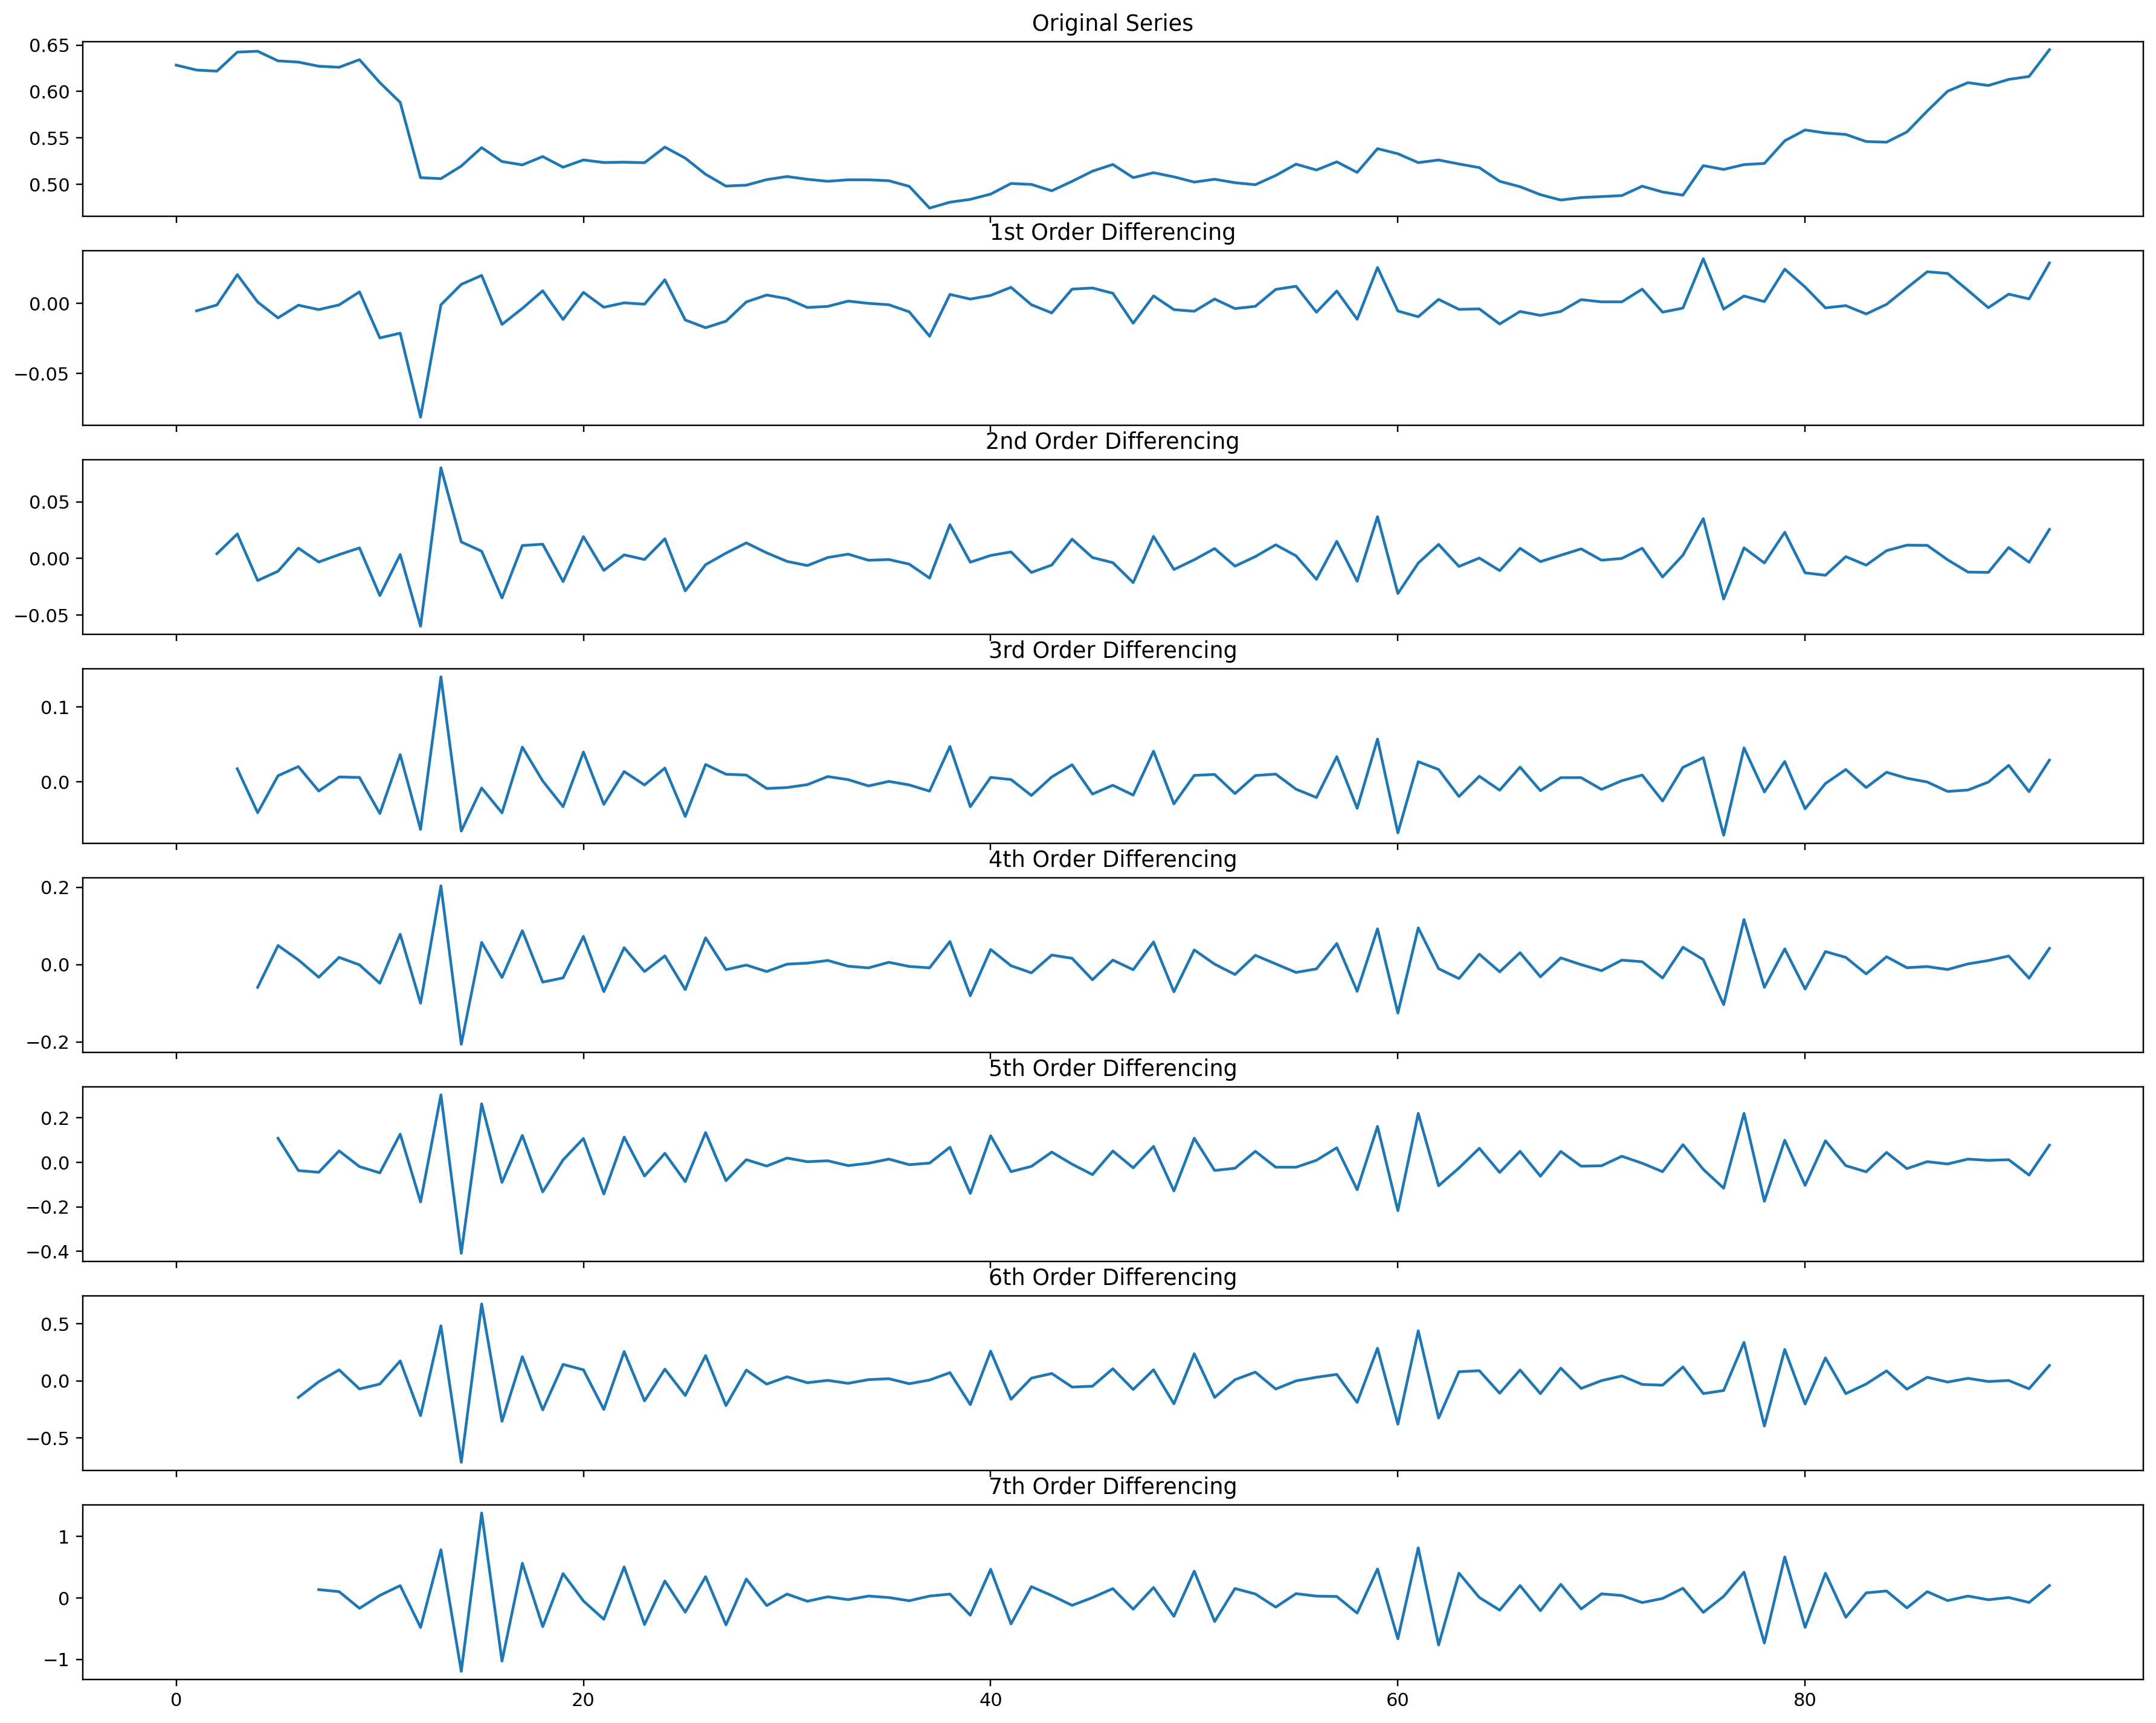

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(20,16), 'figure.dpi':220})


#Original Series
fig, axes = plt.subplots(8, 1, sharex=True)
axes[0].plot(data_log_diff); axes[0].set_title('Original Series')
# 1st Differencing
axes[1].plot(data_log_diff.diff()); axes[1].set_title('1st Order Differencing')
# 2nd Differencing
axes[2].plot(data_log_diff.diff().diff()); axes[2].set_title('2nd Order Differencing')
#3rd Differencing
axes[3].plot(data_log_diff.diff().diff().diff()); axes[3].set_title('3rd Order Differencing')
#4th Differencing
axes[4].plot(data_log_diff.diff().diff().diff().diff()); axes[4].set_title('4th Order Differencing')
#5th Differencing
axes[5].plot(data_log_diff.diff().diff().diff().diff().diff()); axes[5].set_title('5th Order Differencing')
#6th Differencing
axes[6].plot(data_log_diff.diff().diff().diff().diff().diff().diff()); axes[6].set_title('6th Order Differencing')
#7th Differencing
axes[7].plot(data_log_diff.diff().diff().diff().diff().diff().diff().diff()); axes[7].set_title('7th Order Differencing')





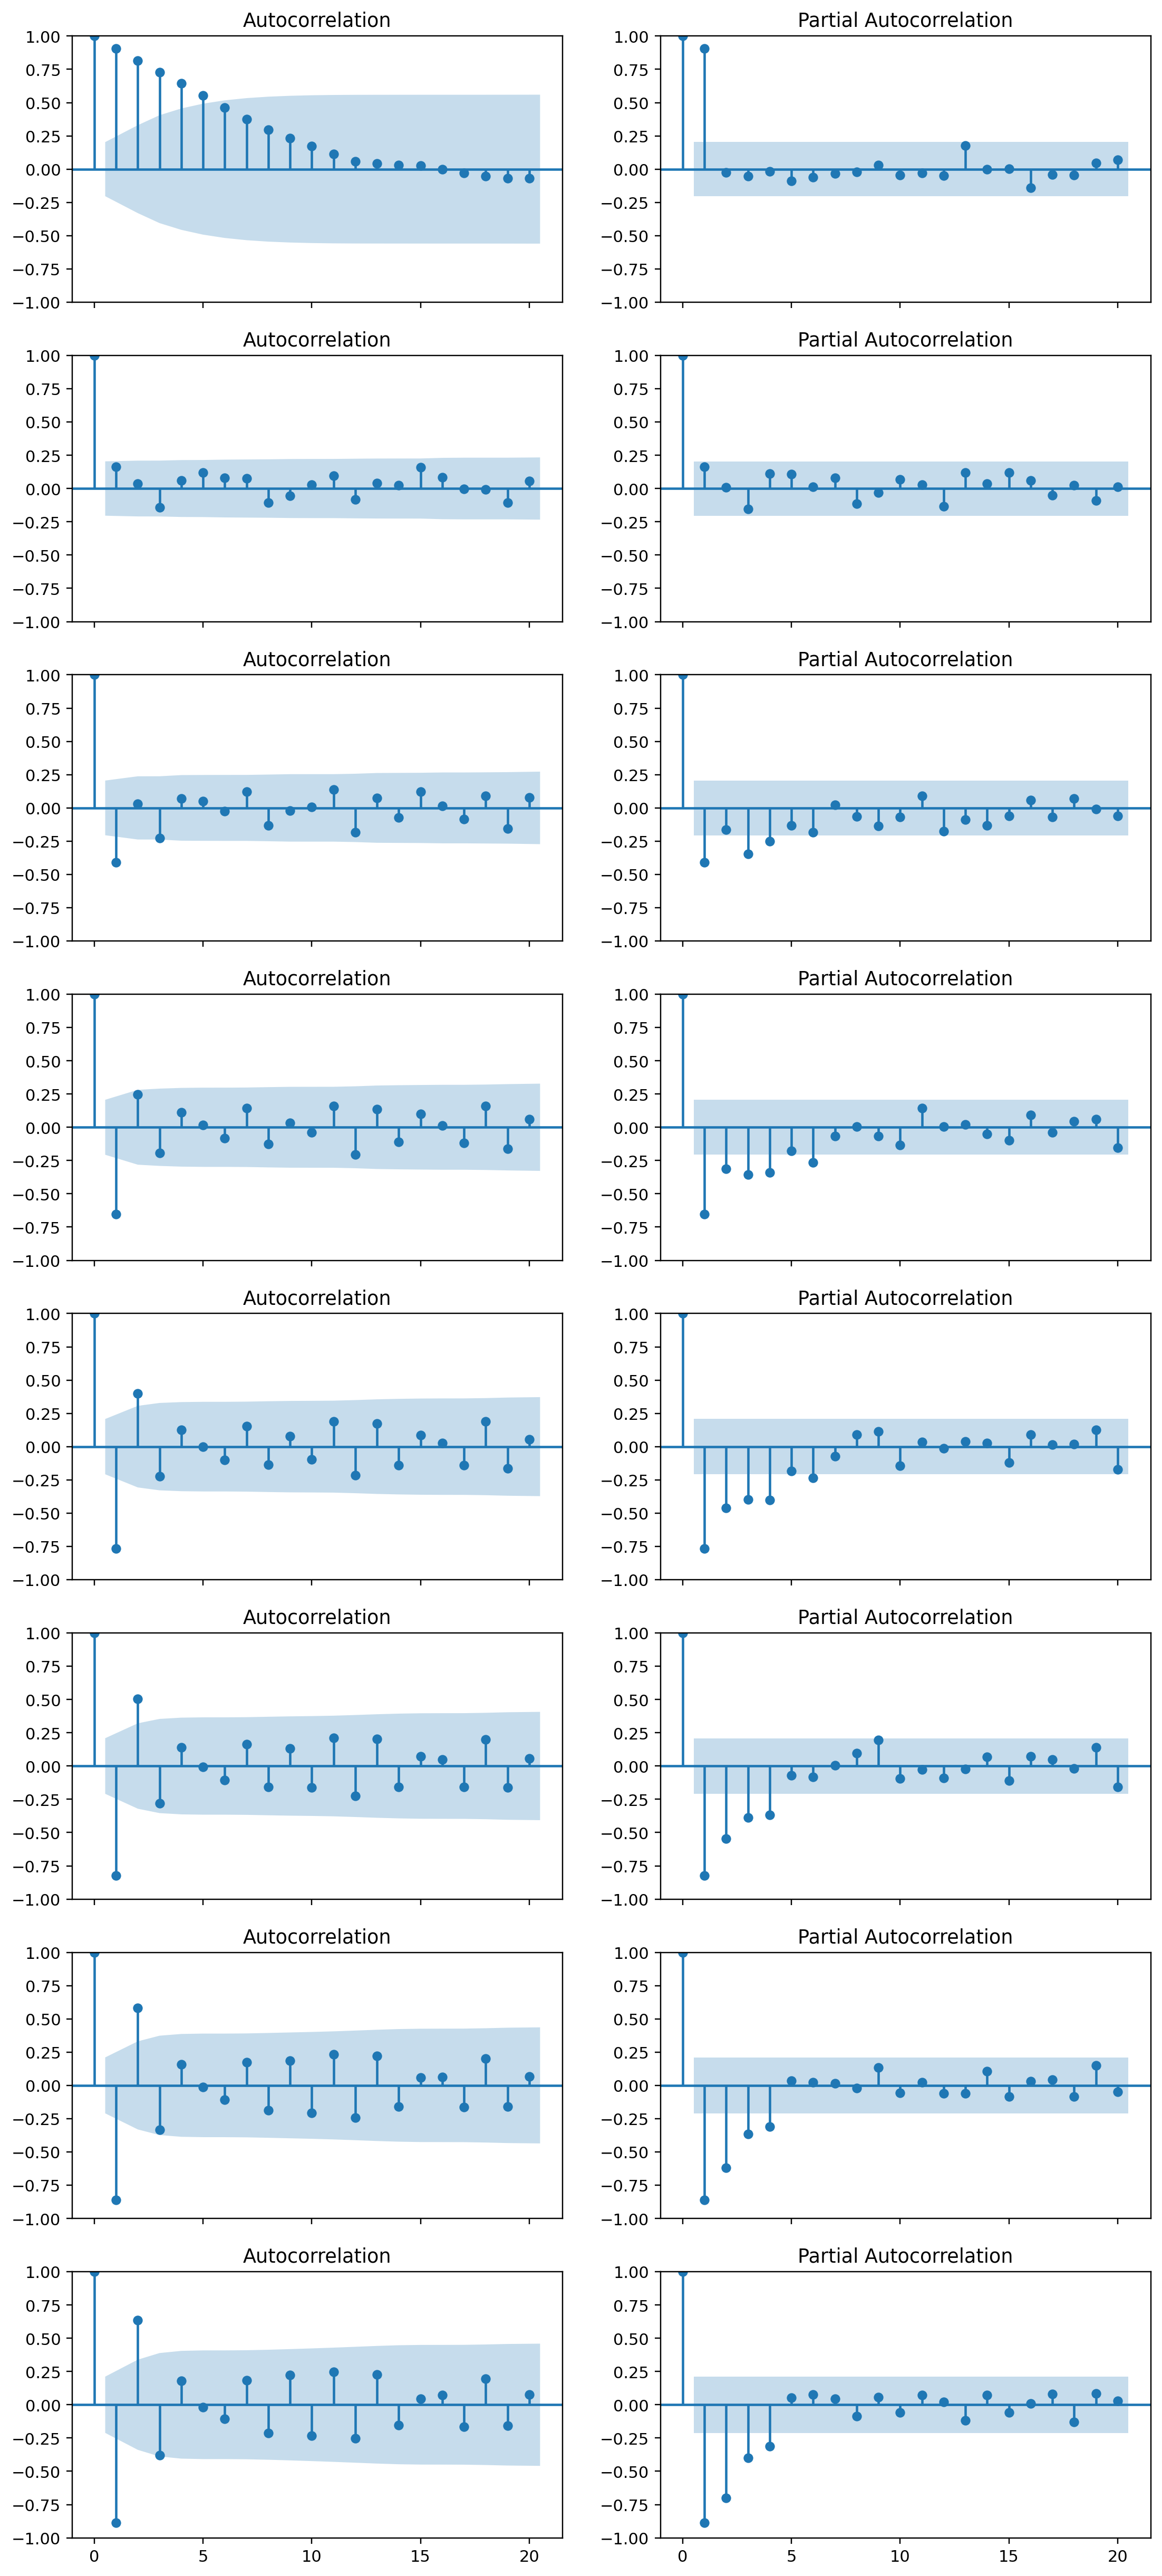

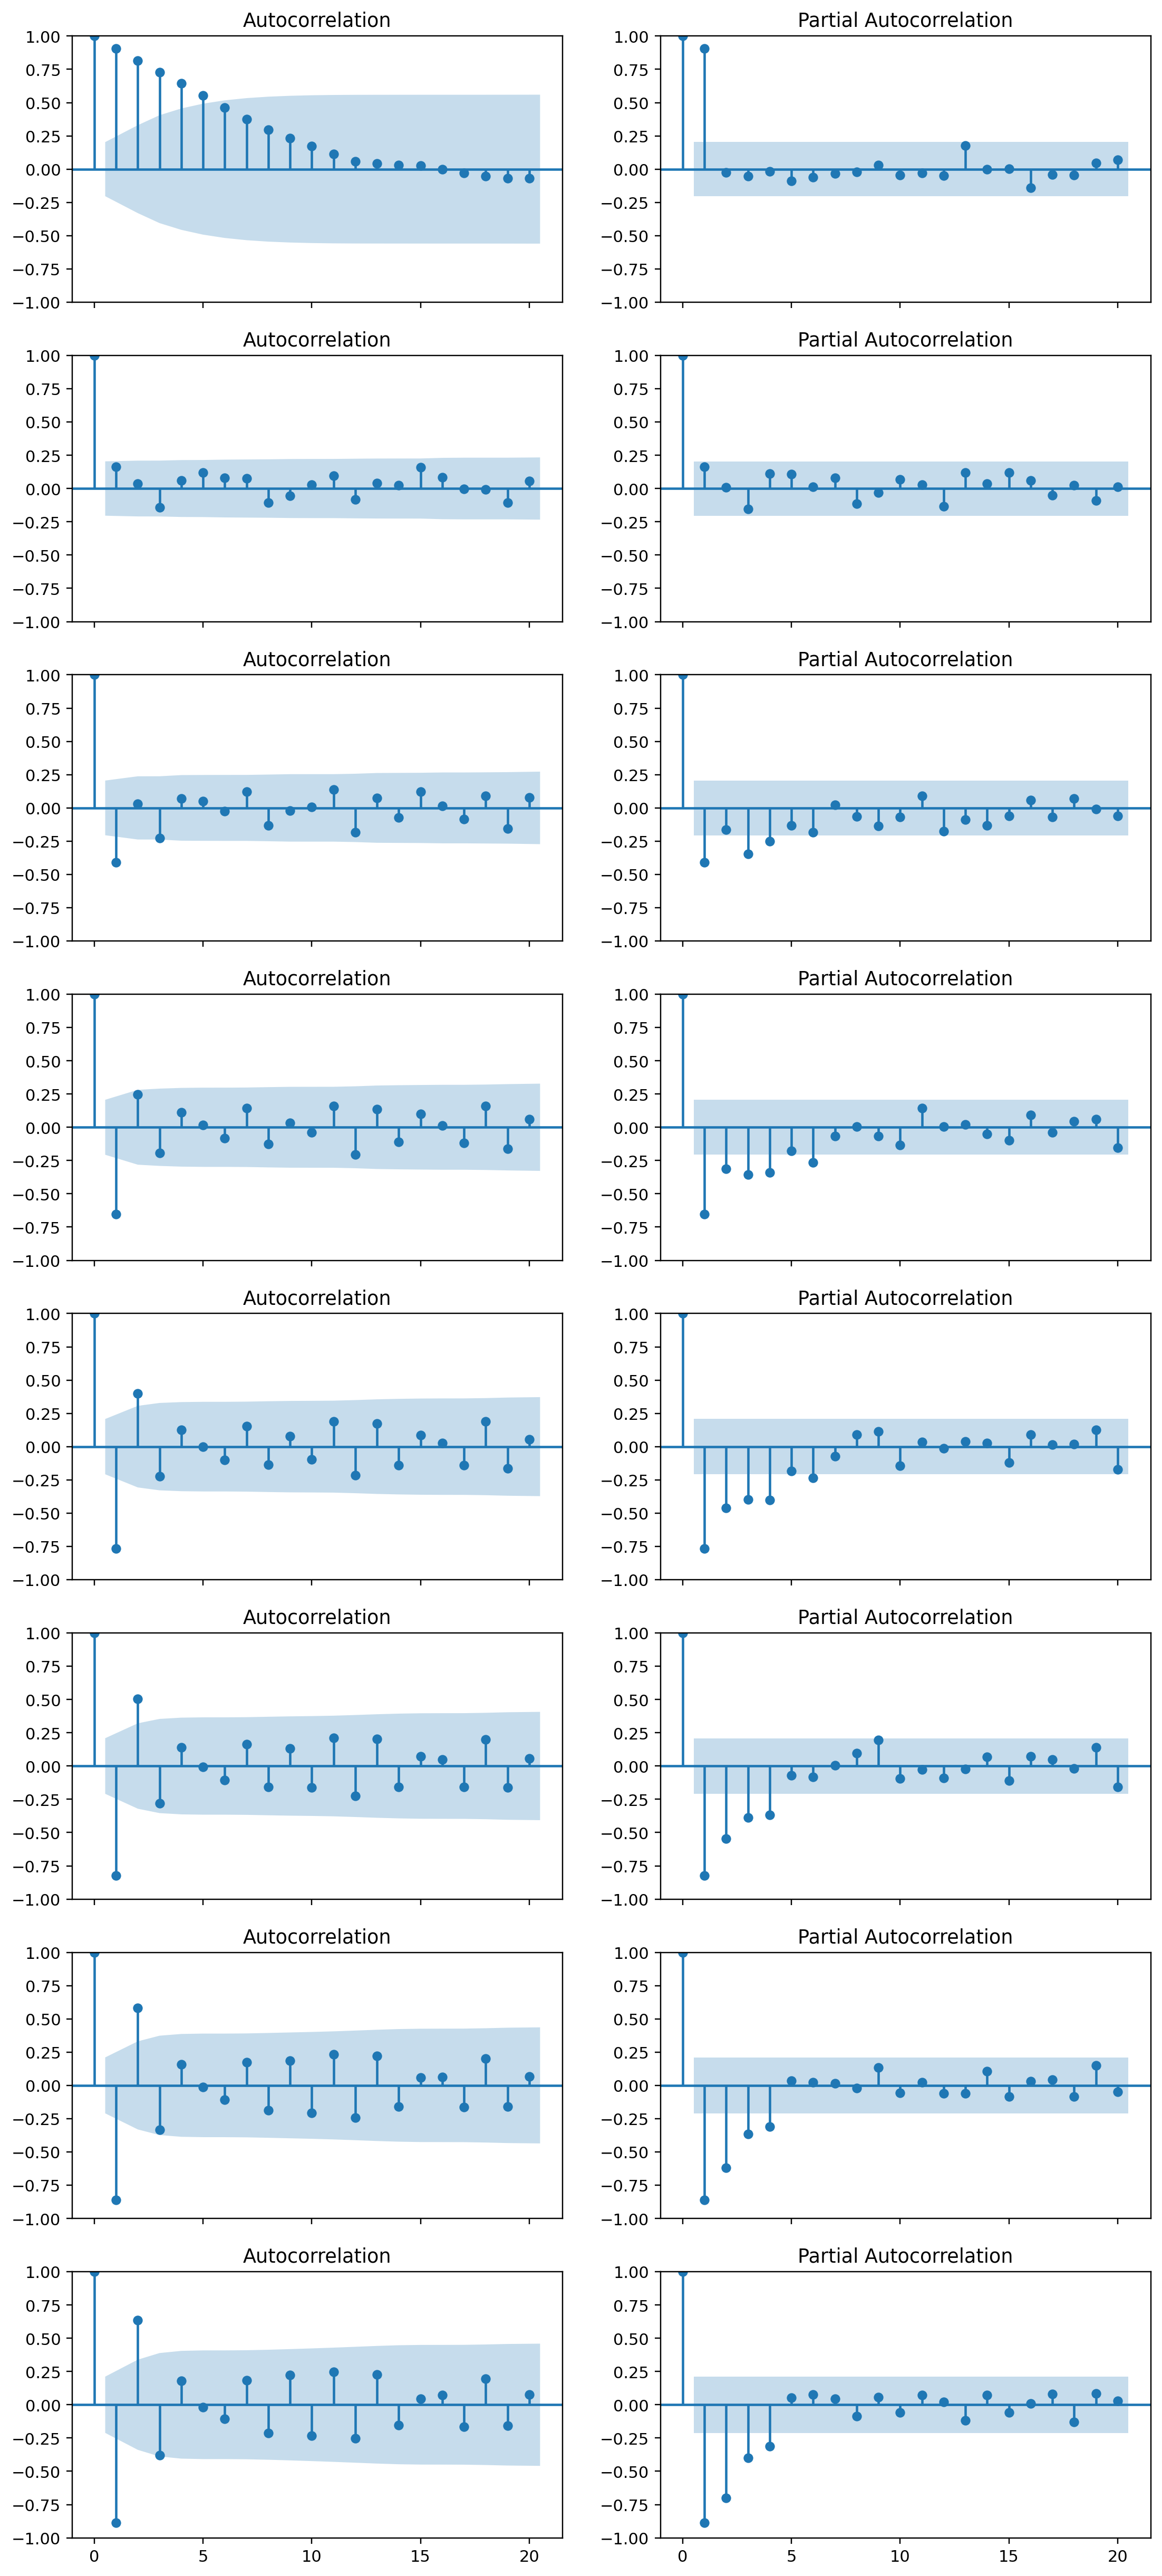

In [8]:
plt.rcParams.update({'figure.figsize':(12,28), 'figure.dpi':220})
fig, axes = plt.subplots(8, 2, sharex=True)
plot_acf(data_log_diff.dropna(), ax=axes[0, 0])
plot_pacf(data_log_diff.dropna(), ax=axes[0, 1])
plot_acf(data_log_diff.diff().dropna(), ax=axes[1, 0])
plot_pacf(data_log_diff.diff().dropna(), ax=axes[1, 1])
plot_acf(data_log_diff.diff().diff().dropna(), ax=axes[2, 0])
plot_pacf(data_log_diff.diff().diff().dropna(), ax=axes[2, 1])
plot_acf(data_log_diff.diff().diff().diff().dropna(), ax=axes[3, 0])
plot_pacf(data_log_diff.diff().diff().diff().dropna(), ax=axes[3, 1])
plot_acf(data_log_diff.diff().diff().diff().diff().dropna(), ax=axes[4, 0])
plot_pacf(data_log_diff.diff().diff().diff().diff().dropna(), ax=axes[4, 1])
plot_acf(data_log_diff.diff().diff().diff().diff().diff().dropna(), ax=axes[5, 0])
plot_pacf(data_log_diff.diff().diff().diff().diff().diff().dropna(), ax=axes[5, 1])
plot_acf(data_log_diff.diff().diff().diff().diff().diff().diff().dropna(), ax=axes[6, 0])
plot_pacf(data_log_diff.diff().diff().diff().diff().diff().diff().dropna(), ax=axes[6, 1])
plot_acf(data_log_diff.diff().diff().diff().diff().diff().diff().diff().dropna(), ax=axes[7, 0])
plot_pacf(data_log_diff.diff().diff().diff().diff().diff().diff().diff().dropna(), ax=axes[7, 1])


In [9]:
from statsmodels.tsa.stattools import adfuller
#interested 1, 2, 3, 4, 5, 6, 7
ls_0 = data_log_diff.dropna()
adf_test_0 = adfuller(ls_0) #1
print(f'p-value_0: {adf_test_0[1]}')

# adf_test_01 = len(str(adf_test_0))
# print(adf_test_01)
# if adf_test_01 >= 0.05:
#     print('no stationarity')

ls_1 = data_log_diff.diff().dropna()
adf_test_1 = adfuller(ls_1) #1
print(f'p-value_1: {adf_test_1[1]}')

ls_2 = data_log_diff.diff().diff().dropna()
adf_test_2 = adfuller(ls_2) #2
print(f'p-value_2: {adf_test_2[1]}')

ls_3 = data_log_diff.diff().diff().diff().dropna()
adf_test_3 = adfuller(ls_3) #3
print(f'p-value_3: {adf_test_3[1]}')

ls_4 = data_log_diff.diff().diff().diff().diff().dropna()
adf_test_4 = adfuller(ls_4) #4
print(f'p-value_4: {adf_test_4[1]}')

ls_5 = data_log_diff.diff().diff().diff().diff().diff().dropna()
#print(ls)
adf_test_5 = adfuller(ls_5) #5
print(f'p-value_5: {adf_test_5[1]}')

ls_6 = data_log_diff.diff().diff().diff().diff().diff().diff().dropna()
adf_test_6 = adfuller(ls_6) #6
print(f'p-value_6: {adf_test_6[1]}')

ls_7 = data_log_diff.diff().diff().diff().diff().diff().diff().diff().dropna()
adf_test_7 = adfuller(ls_7) #7
print(f'p-value_7: {adf_test_7[1]}')



p-value_0: 0.6907247494576652
p-value_1: 9.819903853566805e-12
p-value_2: 2.8264118156422477e-09
p-value_3: 3.4143520634268065e-12
p-value_4: 1.8104354516992143e-12
p-value_5: 5.229832803388476e-12
p-value_6: 9.523014464758783e-14
p-value_7: 4.0293505418912087e-13


In [10]:
#таким образом:
#   p - смотриться по графику частичной автокорреляции (pacf), наиболее высокий лаг есть значение p, или же наименьший
#   d - смотриться по тесту Дики-Фуллера, значение должно быть меньше 0,05. Однако, тут нужно будет эксперементиовать,
#   так что придется стороить разные модели. Однако еще важно смотреть на графики acf и pacf, что бы сохранялся разрыв между лагами,
#   то есть лучше всего, что бы 1 лаг очень большой, а все остальные маленькие
#   q - смотриться по графику автокрреляции (acf), где q, число лагов, выходящих за доверительный интервал, или же наименьший лаг
### отбор параметров для цикла

In [11]:
### поле для "ручного отбора" (не используется, тк есть цикл, однако, иногда полезно)

In [12]:
#### перераспределение комбинаций, в данный момент не используется, однако если требуется ручной отбор параметров, следует использовать
# import itertools
# #1
# def generate_combinations(p_values_1, d_values_1, q_values_1):
#     combinations_1 = []
#     for p in p_values_1:
#         for d in d_values_1:
#             for q in q_values_1:
#                 combinations_1.append((p, d, q))
#     return combinations_1

# p_values_1 = [1, 7]
# d_values_1 = [1]
# q_values_1 = [2, 7]

# combinations_1 = generate_combinations(p_values_1, d_values_1, q_values_1)
# print('значения ARIMA с d=1 :', combinations_1)

# #2
# def generate_combinations(p_values_2, d_values_2, q_values_2):
#     combinations_2 = []
#     for p in p_values_2:
#         for d in d_values_2:
#             for q in q_values_2:
#                 combinations_2.append((p, d, q))
#     return combinations_2

# p_values_2 = [1, 4, 5]
# d_values_2 = [2]
# q_values_2 = [1, 3]


# combinations_2 = generate_combinations(p_values_2, d_values_2, q_values_2)
# print('значения ARIMA с d=2 :', combinations_2) 

# #3
# def generate_combinations(p_values_3, d_values_3, q_values_3):
#     combinations_3 = []
#     for p in p_values_3:
#         for d in d_values_3:
#             for q in q_values_3:
#                 combinations_3.append((p, d, q))
#     return combinations_3

# p_values_3 = [1, 15, 16]
# d_values_3 = [3]
# q_values_3 = [1, 5]

# combinations_3 = generate_combinations(p_values_3, d_values_3, q_values_3)
# print('значения ARIMA с d=3 :', combinations_3)

# #5
# def generate_combinations(p_values_5, d_values_5, q_values_5):
#     combinations_5 = []
#     for p in p_values_5:
#         for d in d_values_5:
#             for q in q_values_5:
#                 combinations_5.append((p, d, q))
#     return combinations_5

# p_values_5 = [1, 7, 8]
# d_values_5 = [5]
# q_values_5 = [4, 5]

# combinations_5 = generate_combinations(p_values_5, d_values_5, q_values_5)
# print('значения ARIMA с d=5 :', combinations_5)

In [13]:
### проверка трех параметров оцененных комбинаций: 
# from scipy.stats import jarque_bera

# def calculate_aic_bic(y, arima_order):
#     model = ARIMA(y, order=arima_order)
#     model_fit = model.fit()
#     aic = model_fit.aic
#     bic = model_fit.bic
#     return aic, bic

# def calculate_jarque_bera(y, arima_order):
#     model = ARIMA(y, order=arima_order)
#     model_fit = model.fit()
#     residuals = model_fit.resid
#     jb_value, _ = jarque_bera(residuals)  # Ignore the p-value, skewness, and kurtosis
#     return jb_value

# def main():
#     y = np.array([1, 2, 3, 4, 5])  # Example time series data
    
#     arima_orders_d1 = [(1, 1, 2), (1, 1, 7), (7, 1, 2), (7, 1, 7)]
#     arima_orders_d2 = [(1, 2, 1), (1, 2, 3), (4, 2, 1), (4, 2, 3), (5, 2, 1), (5, 2, 3)]
#     arima_orders_d3 = [(1, 3, 1), (1, 3, 5), (15, 3, 1), (15, 3, 5), (16, 3, 1), (16, 3, 5)]
#     arima_orders_d5 = [(1, 5, 4), (1, 5, 5), (7, 5, 4), (7, 5, 5), (8, 5, 4), (8, 5, 5)]
    
#     for arima_order in arima_orders_d1:
#         aic, bic = calculate_aic_bic(y, arima_order)
#         jb_value = calculate_jarque_bera(y, arima_order)
#         print(f"ARIMA order_d1: {arima_order} | AIC: {aic} | BIC: {bic} | Jarque-Bera: {jb_value}")

#     for arima_order in arima_orders_d2:
#         aic, bic = calculate_aic_bic(y, arima_order)
#         jb_value = calculate_jarque_bera(y, arima_order)
#         print(f"ARIMA order_d2: {arima_order} | AIC: {aic} | BIC: {bic} | Jarque-Bera: {jb_value}")

#     for arima_order in arima_orders_d3:
#         aic, bic = calculate_aic_bic(y, arima_order)
#         jb_value = calculate_jarque_bera(y, arima_order)
#         print(f"ARIMA order_d3: {arima_order} | AIC: {aic} | BIC: {bic} | Jarque-Bera: {jb_value}")

#     for arima_order in arima_orders_d5:
#         aic, bic = calculate_aic_bic(y, arima_order)
#         jb_value = calculate_jarque_bera(y, arima_order)
#         print(f"ARIMA order_d5: {arima_order} | AIC: {aic} | BIC: {bic} | Jarque-Bera: {jb_value}")

# if __name__ == "__main__":
#     main()

In [14]:
###Сначала просмотрим лучшие параметры по аик

best_aic = np.inf
best_params = None 
for p in range(3,10):
	for d in range(2,6):
		for q in range(0,3):
			try:
				model = ARIMA(train, order=(p,d,q))
				model_fit = model.fit()
				if model_fit.aic < best_aic:
					best_aic = model_fit.aic
					best_params = (p,d,q)
			except:
				continue
                
print("Best ARIMA model:", best_params, "AIC:", best_aic)
a = best_params

c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-p

Best ARIMA model: (3, 2, 1) AIC: -430.5619804381518


c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


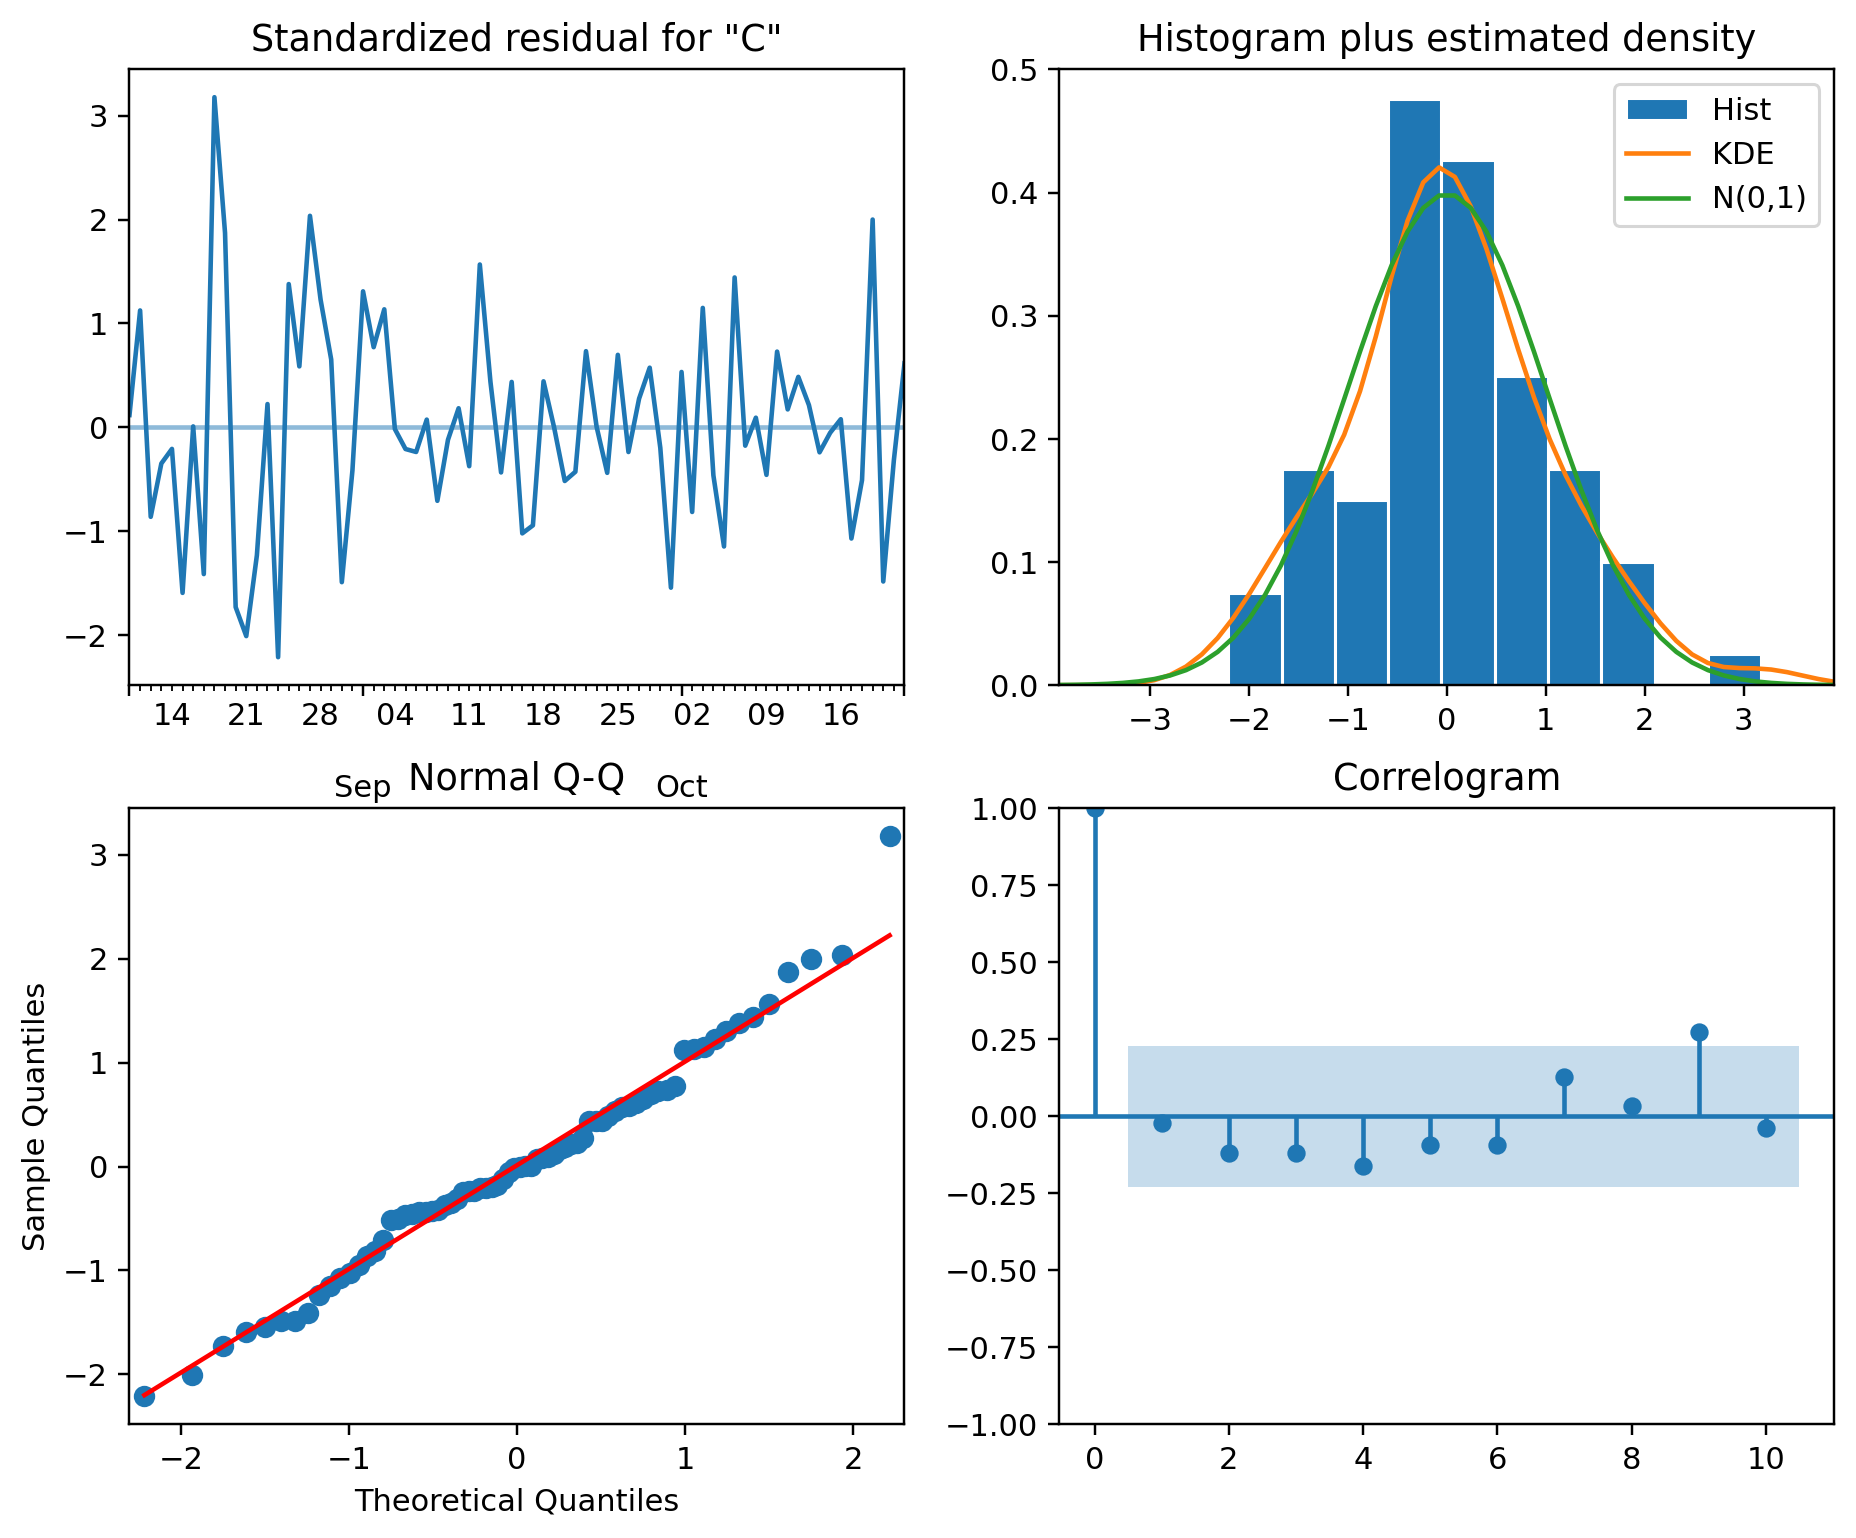

In [15]:
model_fit.plot_diagnostics(figsize=(10,8))
plt.show()

In [16]:
### теперь стоит отобрать лучшие параметры по тесту Харке-Бера, тк выявлено эмпирическим путем что модель лучше работает если комбинировать АИК и ХБ
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA

best_jb = np.inf
best_params = None 

for p in range(3, 10):
    for d in range(2, 4):
        for q in range(0, 3):
            try:
                model = ARIMA(train, order=(p, d, q))
                model_fit = model.fit()
                jb = stats.jarque_bera(model_fit.resid)
                
                if best_params is None or jb < best_jb:
                    best_jb = jb
                    best_params = (p, d, q)
                    
            except:
                continue
                
print("Best ARIMA model:", best_params, "Jarque-Bera:", best_jb)
b = best_params

c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-p

Best ARIMA model: (3, 3, 0) Jarque-Bera: Jarque_beraResult(statistic=3478.1994779955708, pvalue=0.0)


c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


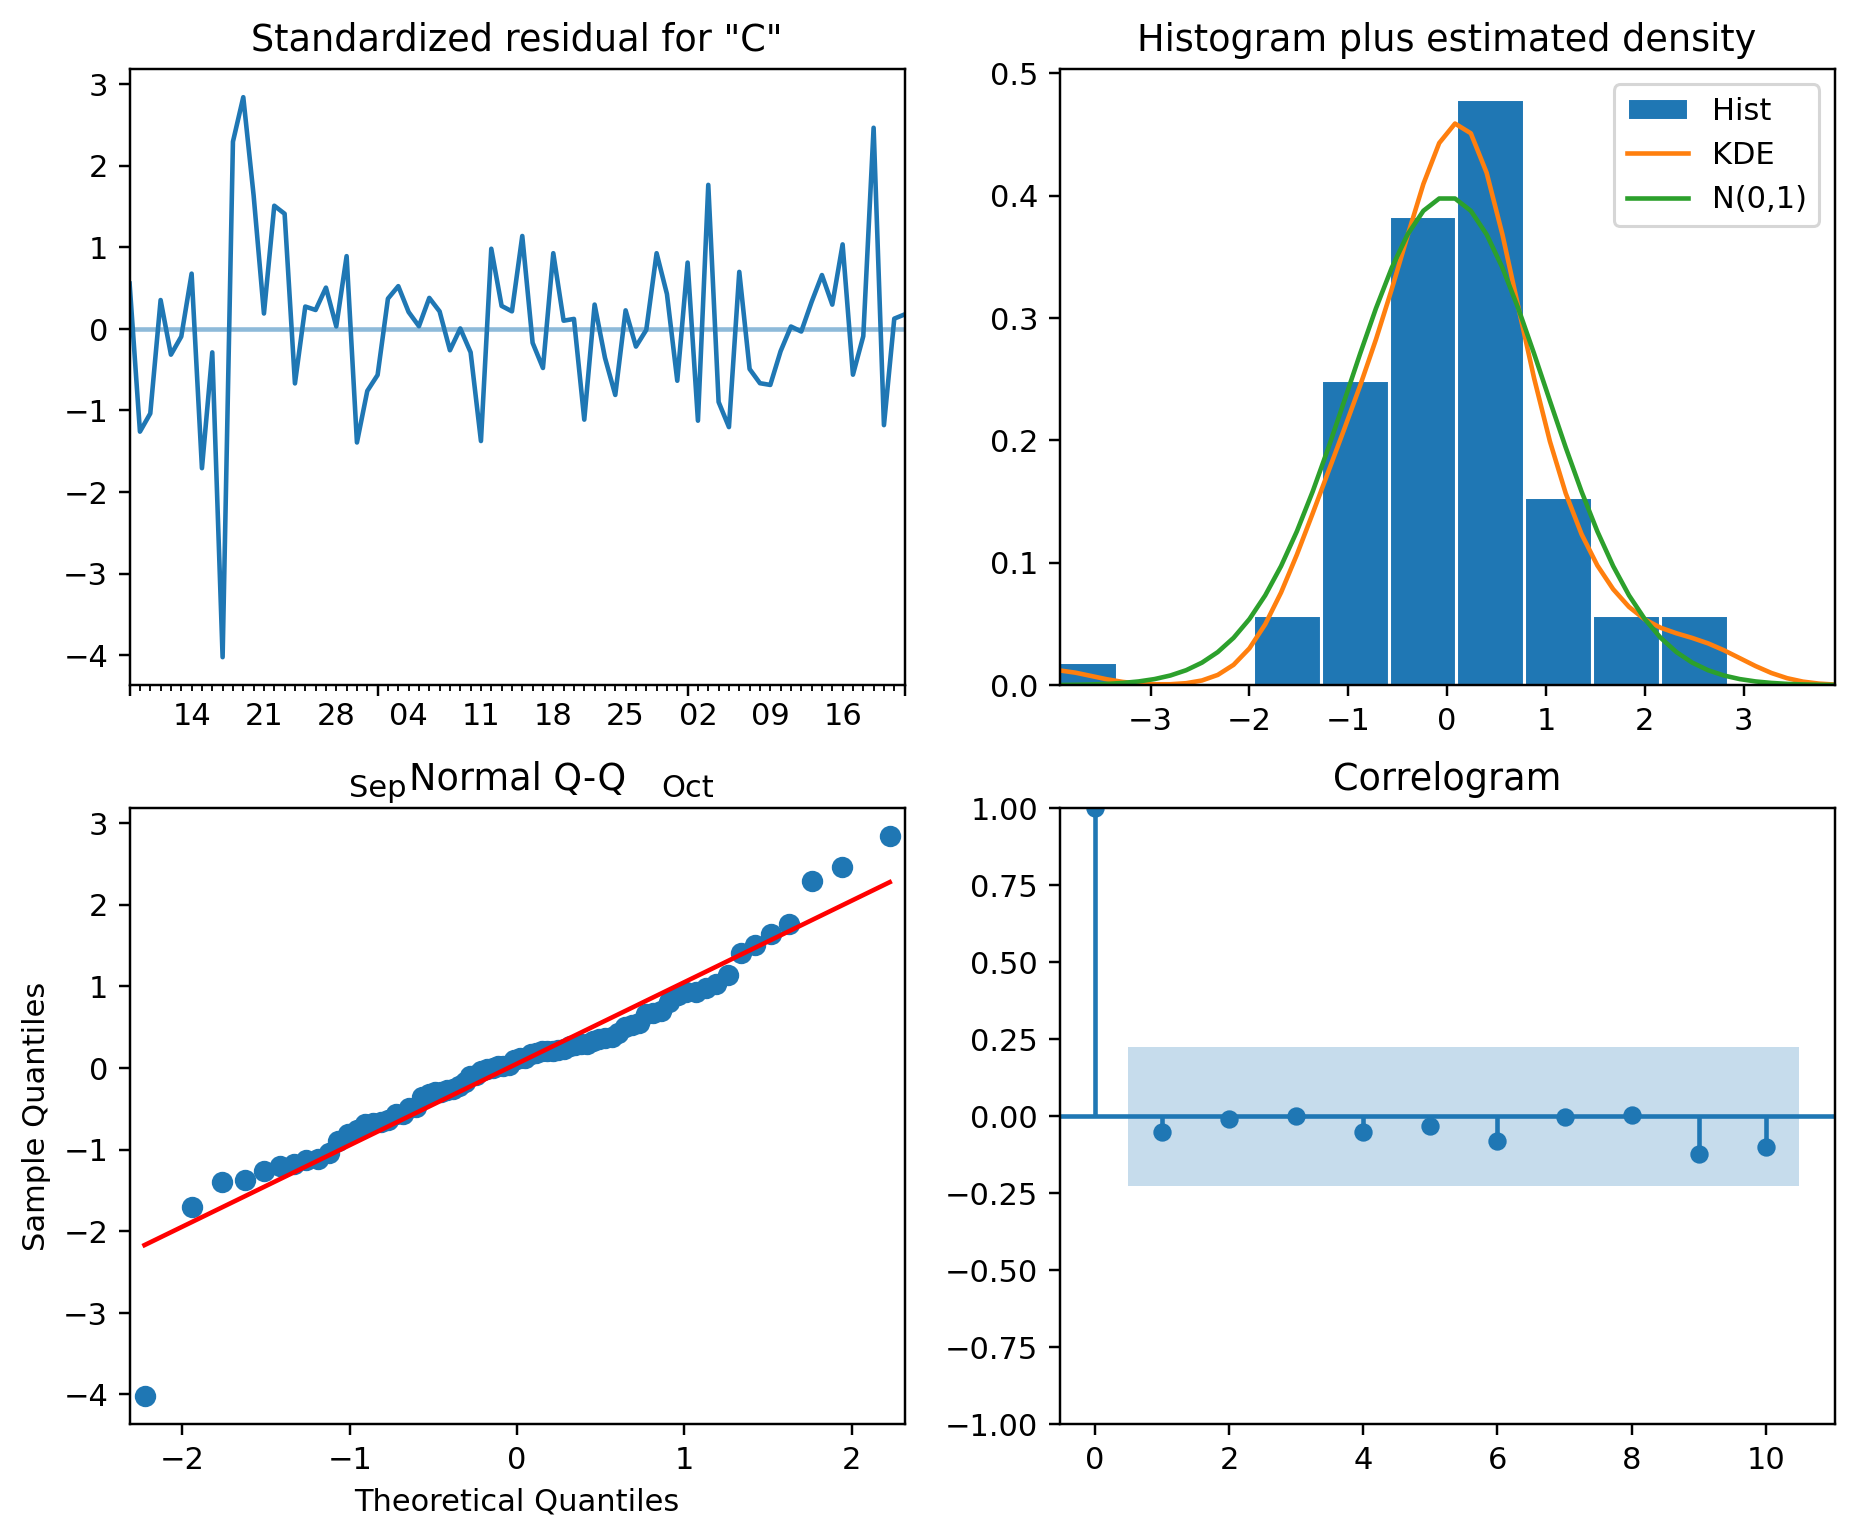

In [17]:
model_fit.plot_diagnostics(figsize=(10,8))
plt.show()

In [18]:
### вывод лучших параметров по двум циклам. Теперь нужно опробовать комбинации несколько комбинаций и определить лучшие
print(a, b)

(3, 2, 1) (3, 3, 0)


In [19]:
model = ARIMA(train, order=(3, 2, 0)) #именно так лучше всего
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   79
Model:                 ARIMA(3, 2, 0)   Log Likelihood                 212.928
Date:                Sun, 05 Nov 2023   AIC                           -417.856
Time:                        15:43:05   BIC                           -408.480
Sample:                    08-05-2023   HQIC                          -414.106
                         - 10-22-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6008      0.069     -8.732      0.000      -0.736      -0.466
ar.L2         -0.3846      0.085     -4.539      0.000      -0.551      -0.219
ar.L3         -0.3555      0.118     -3.007      0.0

c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


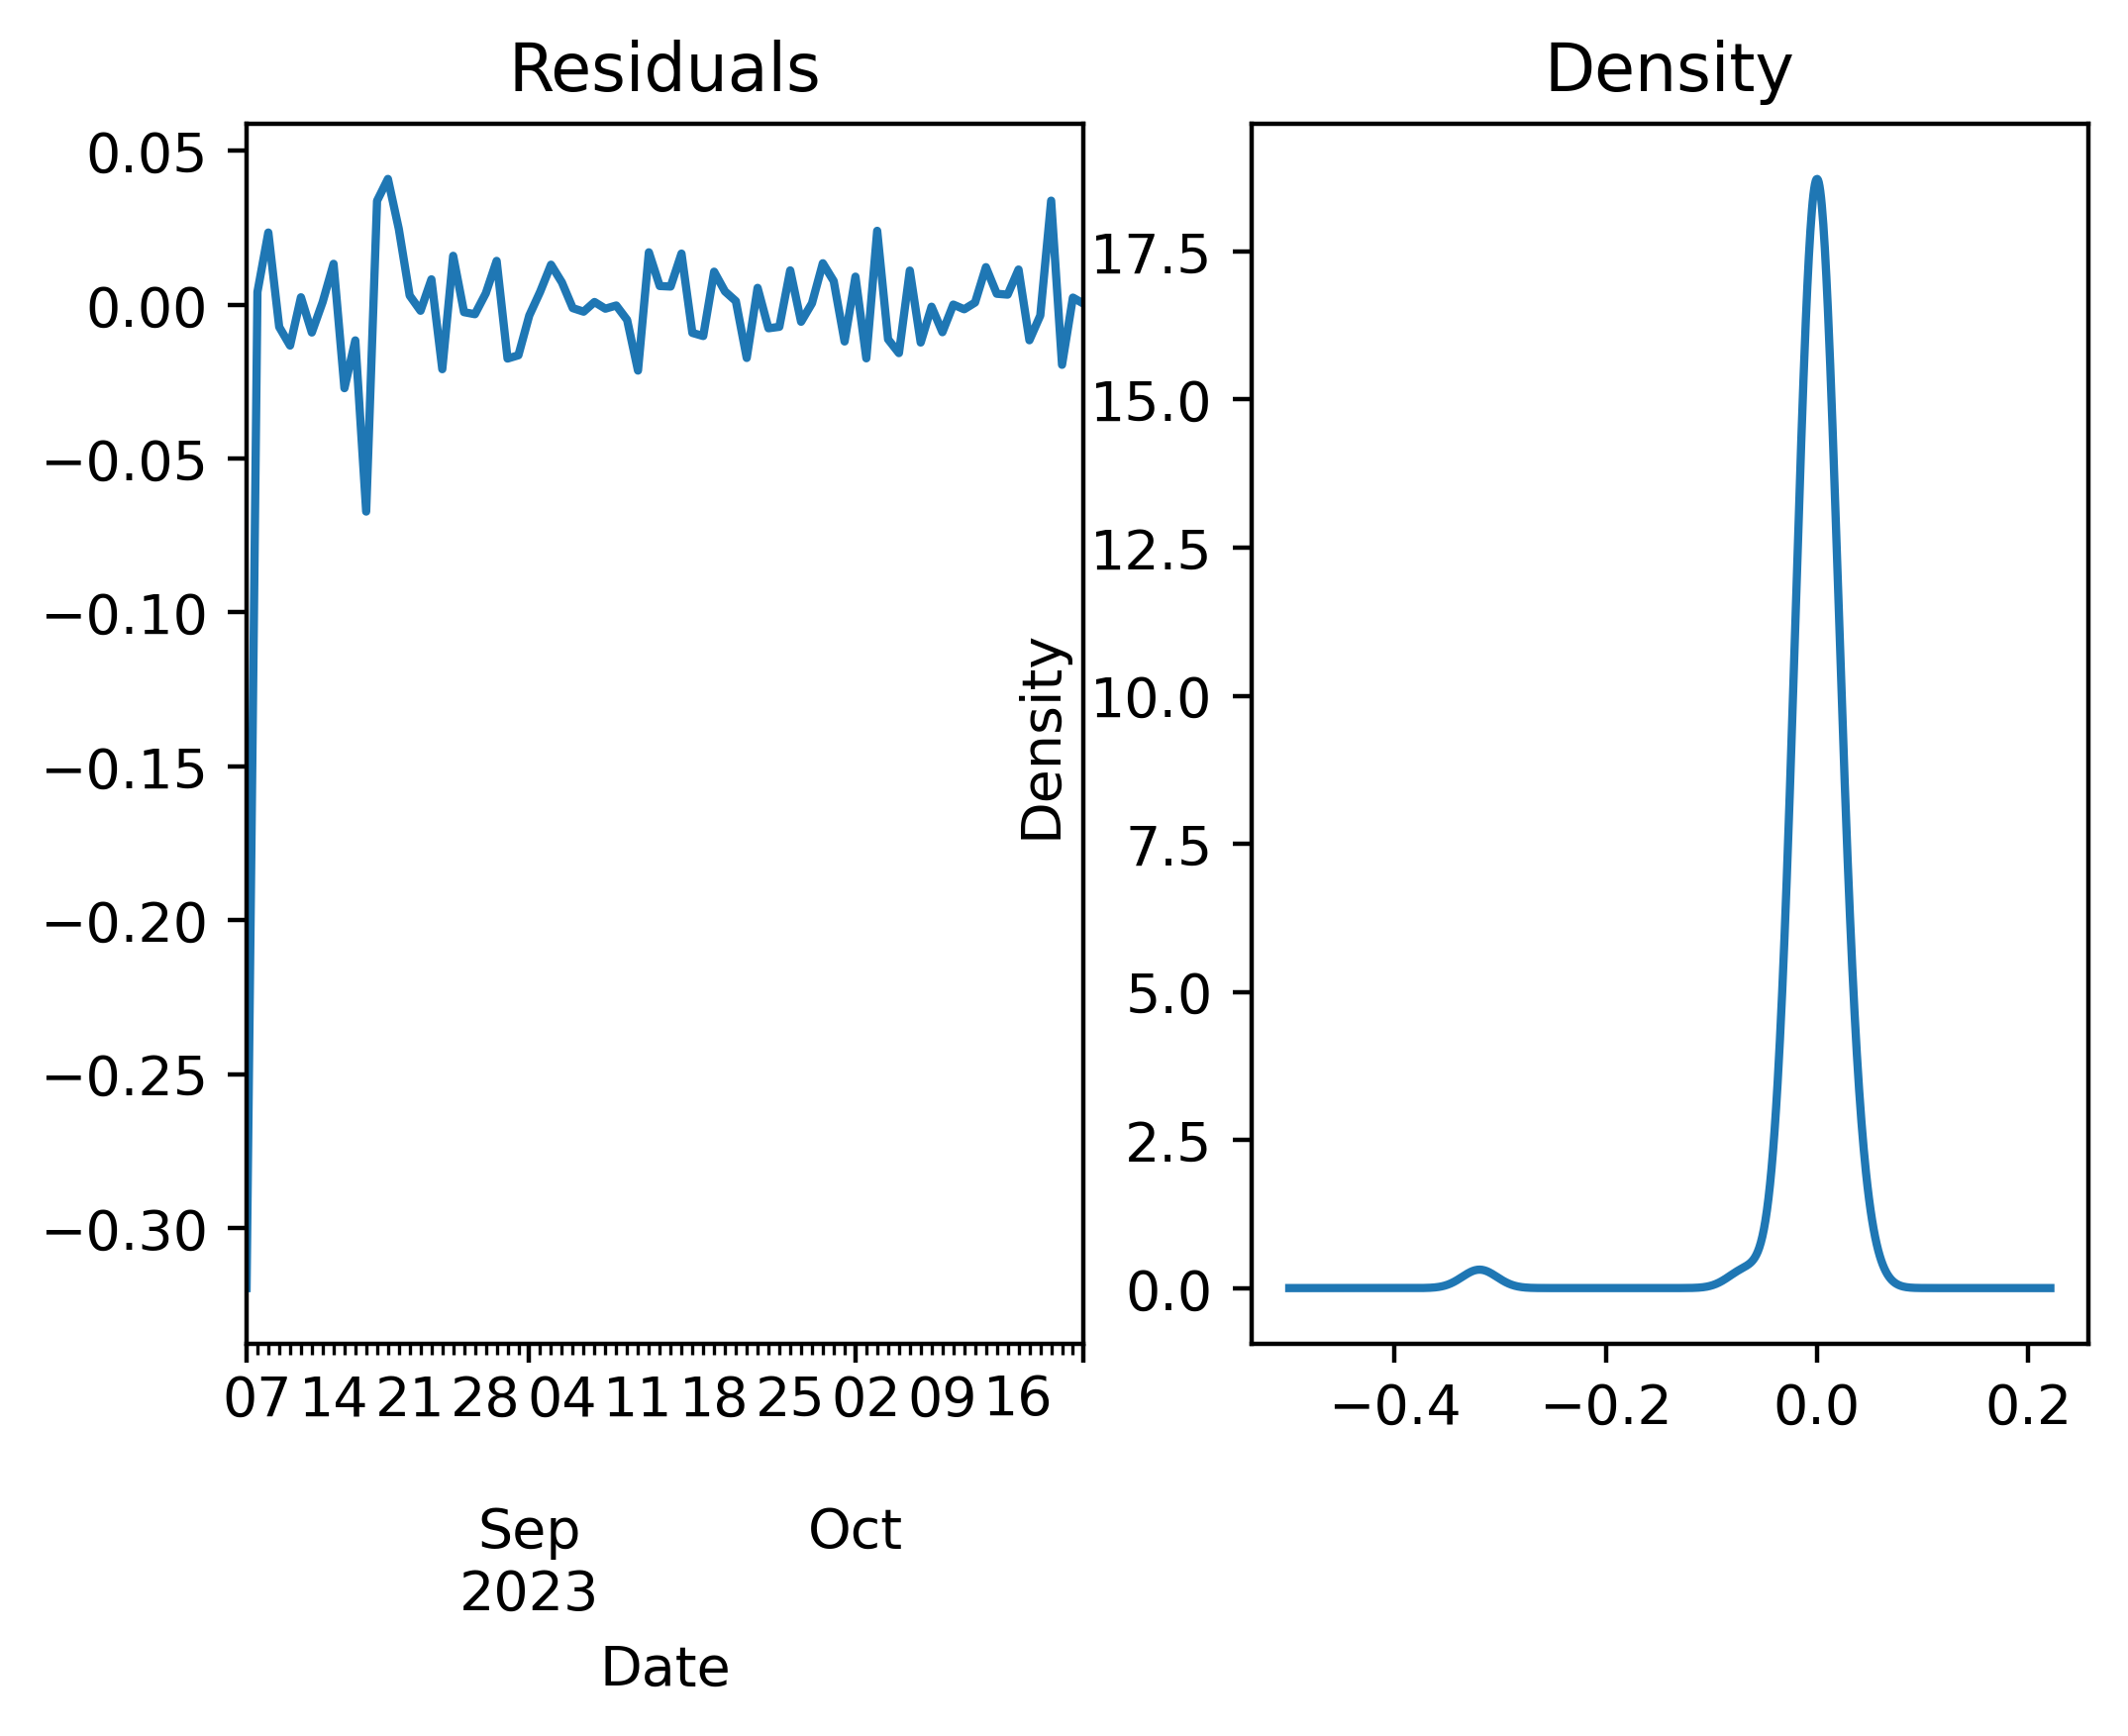

In [20]:
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':400})
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

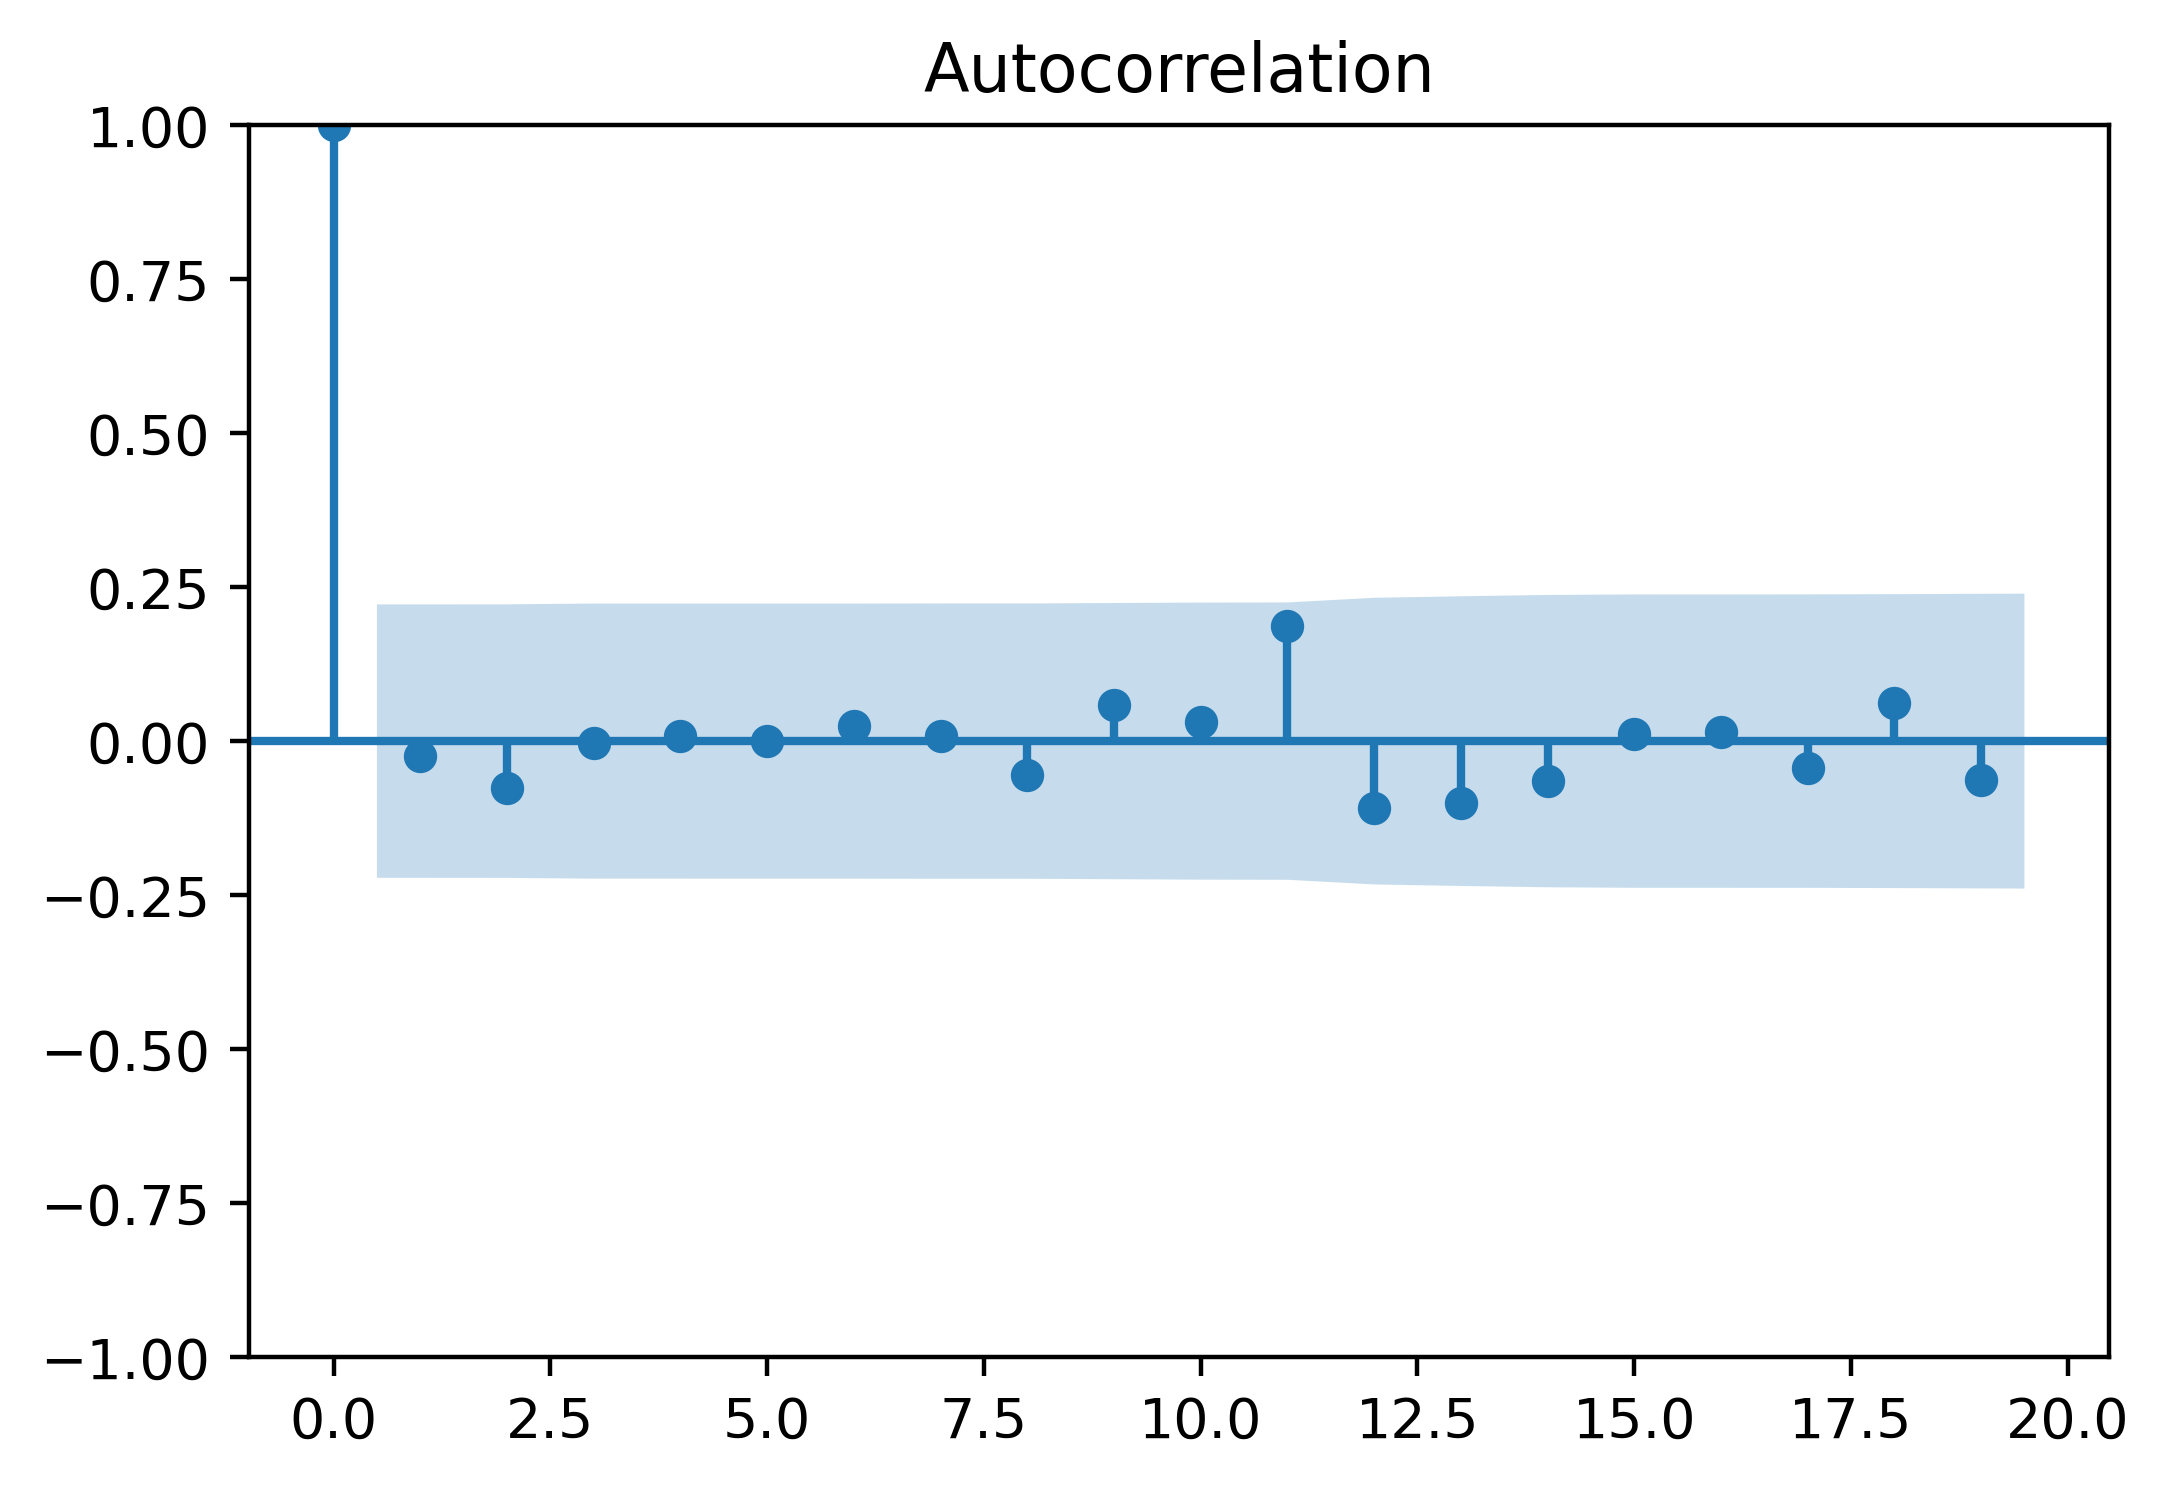

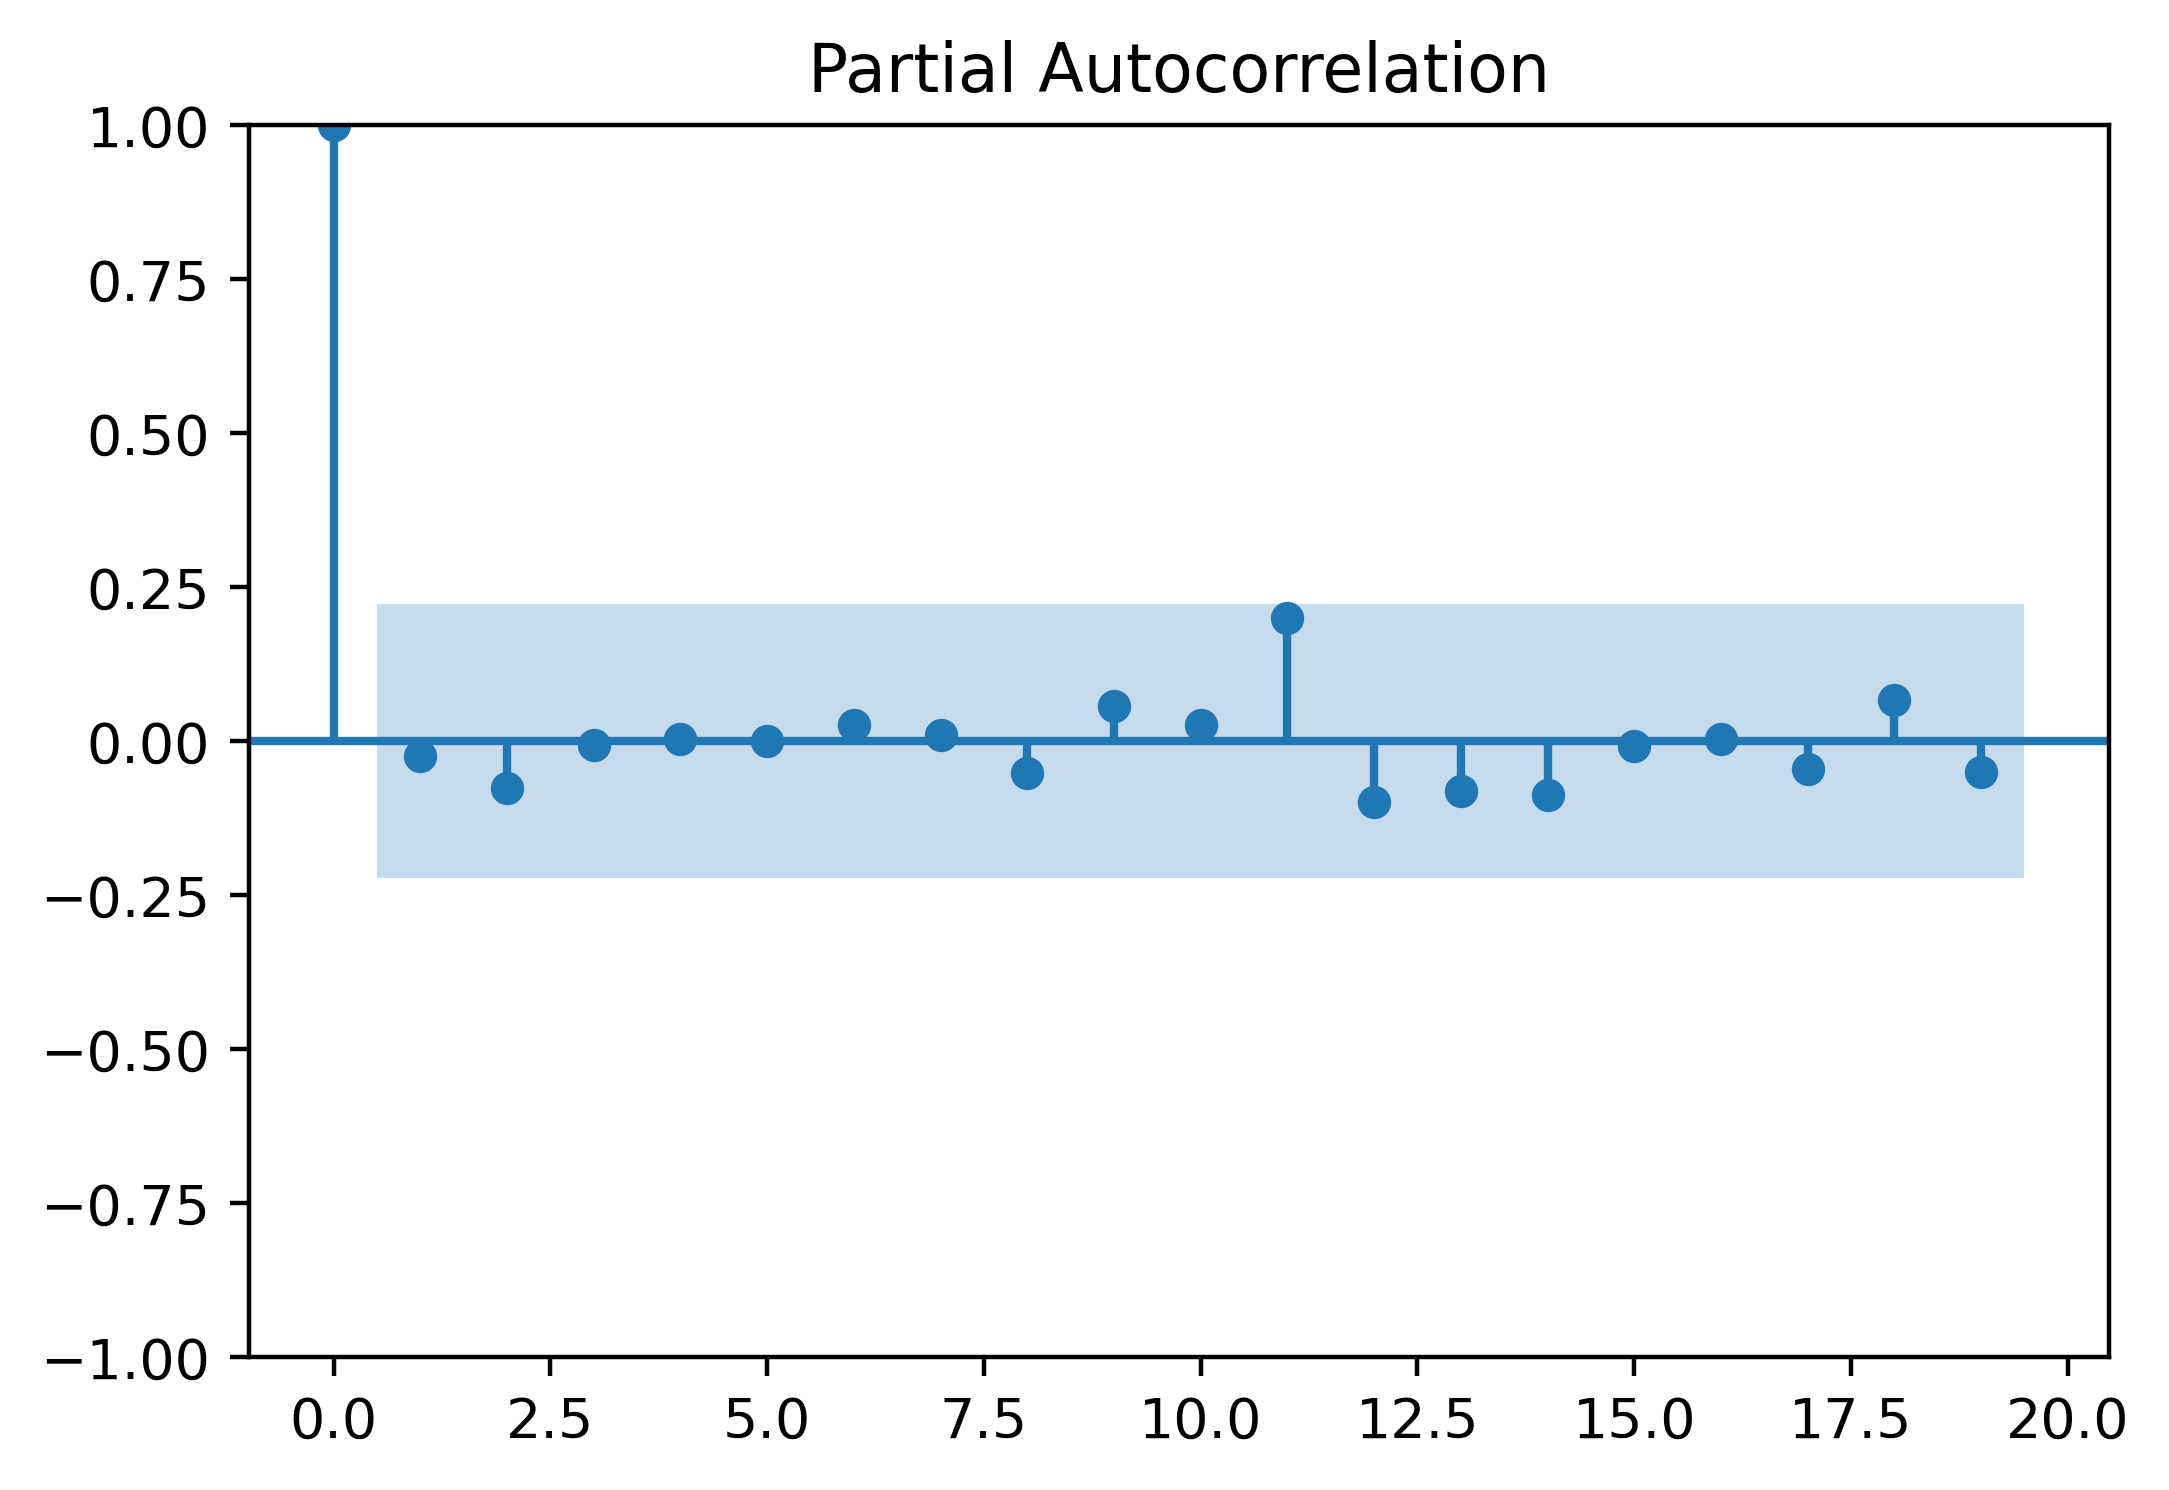

In [21]:
plt.rcParams.update({'figure.figsize':(6,4),'figure.dpi':400})
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

<Axes: >

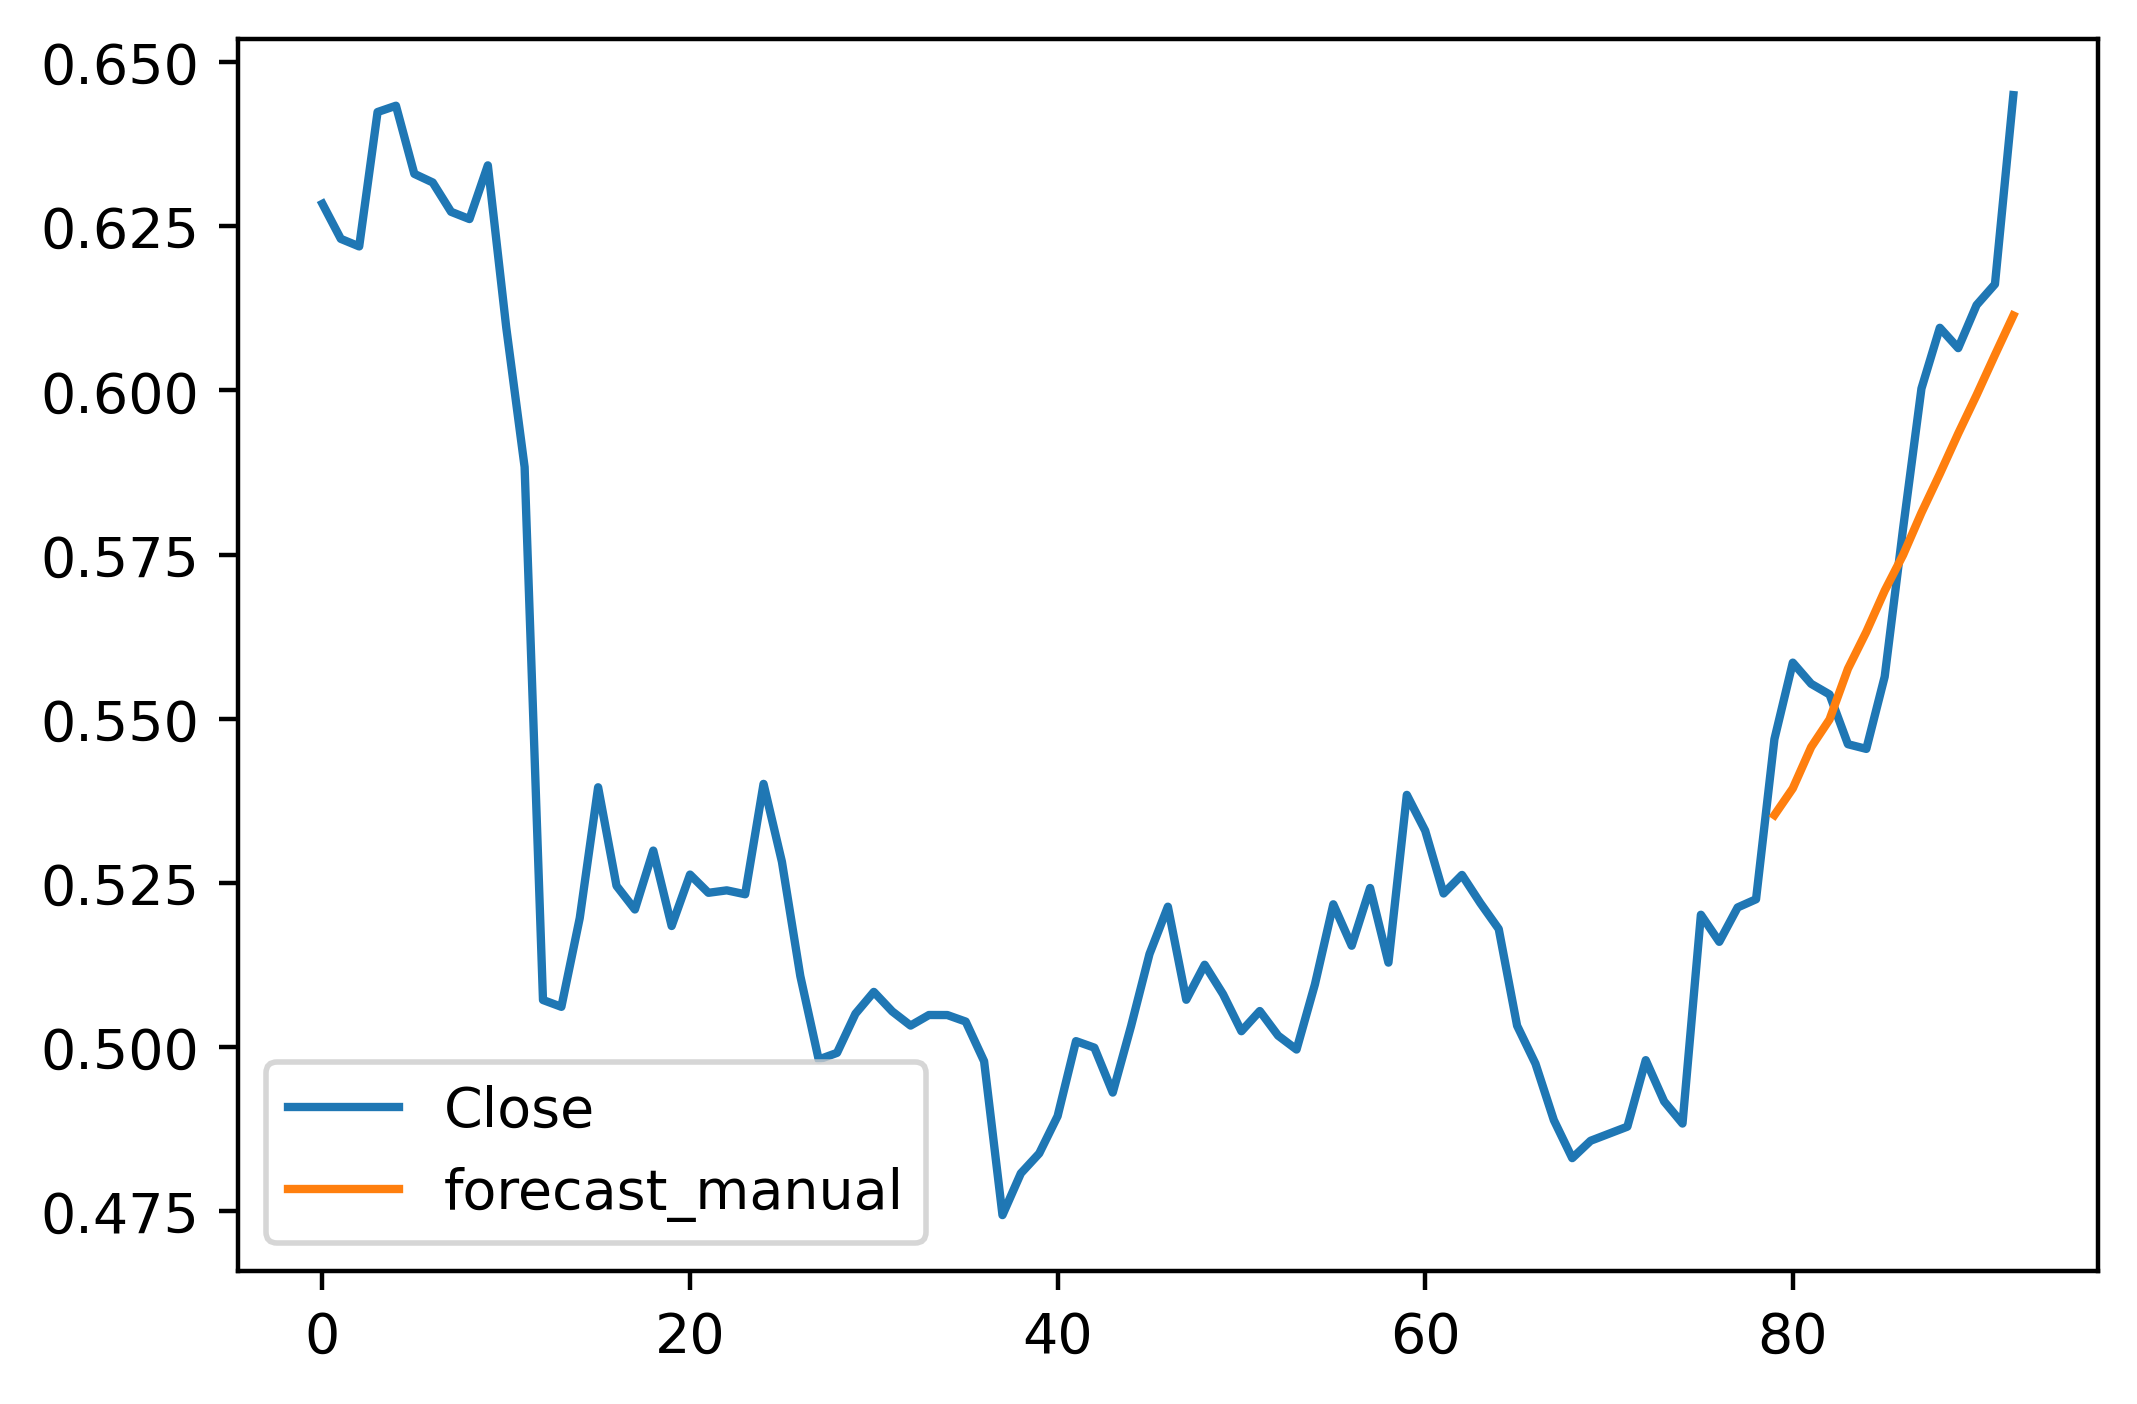

In [22]:
#Тестовые показатели
forecast_test = model_fit.forecast(len(test))

data['forecast_manual'] = [None]*len(train) + list(forecast_test)
# data_log['forecast_manual'] = np.expm1(data_log['forecast_manual'])
# data_log = np.expm1(data_log)

data.plot()

<Axes: >

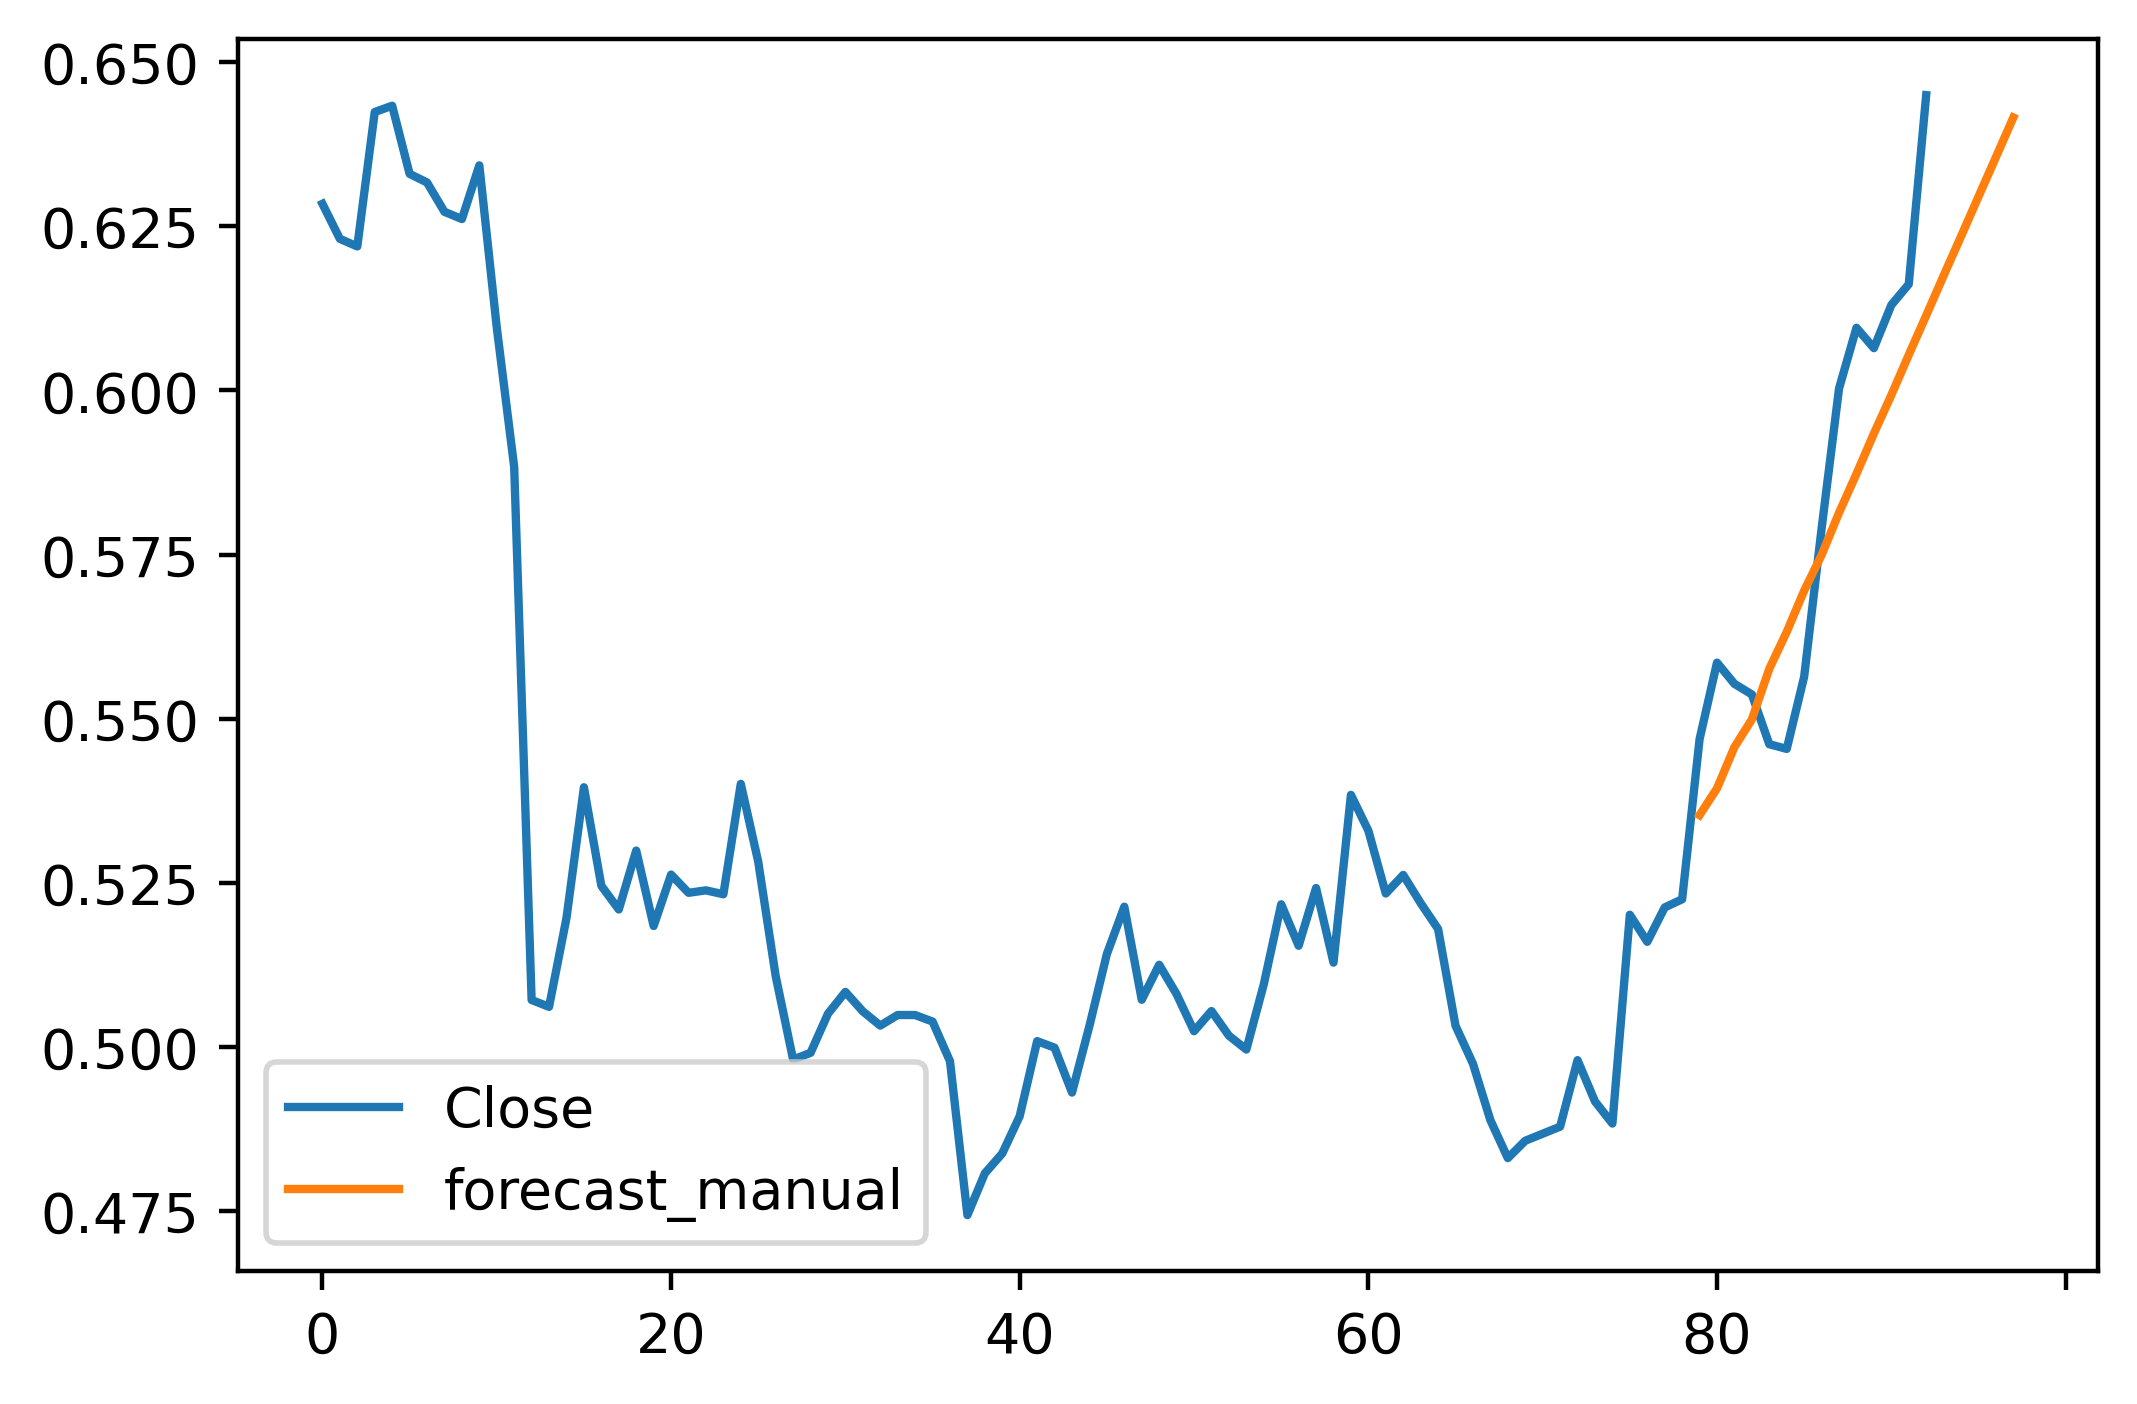

In [23]:
# Прогнозируем на 5 шагов вперед
forecast_test = model_fit.forecast(len(test) + 5)

# Создаем новый DataFrame для прогнозного периода
new_index = pd.date_range(data.index[-1], periods=6, freq='H')[1:] # предполагая, что ваш индекс - это даты
new_df = pd.DataFrame(index=new_index, columns=data.columns)

# Объединяем исходный и новый DataFrames
extended_data = pd.concat([data, new_df])

# Заполняем прогнозные значения
extended_data['forecast_manual'].iloc[len(train):] = forecast_test

# Рисуем график
extended_data.plot()

In [24]:
returns = data.Close.pct_change().dropna()
print(returns)

1    -0.008491
2    -0.001855
3     0.032922
4     0.001493
5    -0.016132
        ...   
88    0.015419
89   -0.005084
90    0.010822
91    0.005191
92    0.046737
Name: Close, Length: 92, dtype: float64


In [25]:
#Построение ARIMA модели для GARCH.
#Подбор оптимальных параметров p, d, q с помощью информационного критерия Акаике (AIC) теста ХБ я сделал до этого, поэтому используем те данные 
arima_model_2 = ARIMA(returns, order=(3,0,0))
arima_model_2_fit = arima_model_2.fit()

c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [26]:
best_aic_garch = np.inf
best_order_garch = None

In [27]:
for i in range(5):
	for j in range(5):
		try:
			# Создание и обучение модели GARCH с заданными параметрами и остатками ARIMA модели в качестве входных данных
			model = arch_model(arima_model_2_fit.resid, vol="GARCH", p=i, q=j)
			model_fit_garch = model.fit(disp="off")
			# Получение значения AIC для модели
			aic = model_fit_garch.aic
			# Сохранение лучшей модели, порядка и AIC
			if aic < best_aic:
				best_aic_garch = aic
				best_order_garch = (i,j)
				best_garch = model_fit_garch
		except:
			continue

print("Best GARCH model:", best_order_garch, "AIC:", best_aic_garch, "Copy CARCH model:", model_fit_garch)
best_garch = model_fit_garch
forecasts = best_garch.forecast(horizon=5) #Проноз на 1 день
variance = forecasts.variance.iloc[-1][0]
std_dev = np.sqrt(variance)


c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005937. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Егор\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005937. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Егор\AppD

Best GARCH model: None AIC: inf Copy CARCH model:                      Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                211.968
Distribution:                  Normal   AIC:                          -403.936
Method:            Maximum Likelihood   BIC:                          -378.718
                                        No. Observations:                   92
Date:                Sun, Nov 05 2023   Df Residuals:                       91
Time:                        15:43:08   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu   

In [28]:
print(model_fit_garch.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                211.968
Distribution:                  Normal   AIC:                          -403.936
Method:            Maximum Likelihood   BIC:                          -378.718
                                        No. Observations:                   92
Date:                Sun, Nov 05 2023   Df Residuals:                       91
Time:                        15:43:08   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         6.6035e-04  2.791e-03      0.237      0.813 

In [29]:
print(std_dev)
print(variance)

0.02426059681466088
0.0005885765578035336


In [30]:
forecasts = best_garch.forecast(horizon=30, method='simulation', simulations=1000)
sims = forecasts.simulations


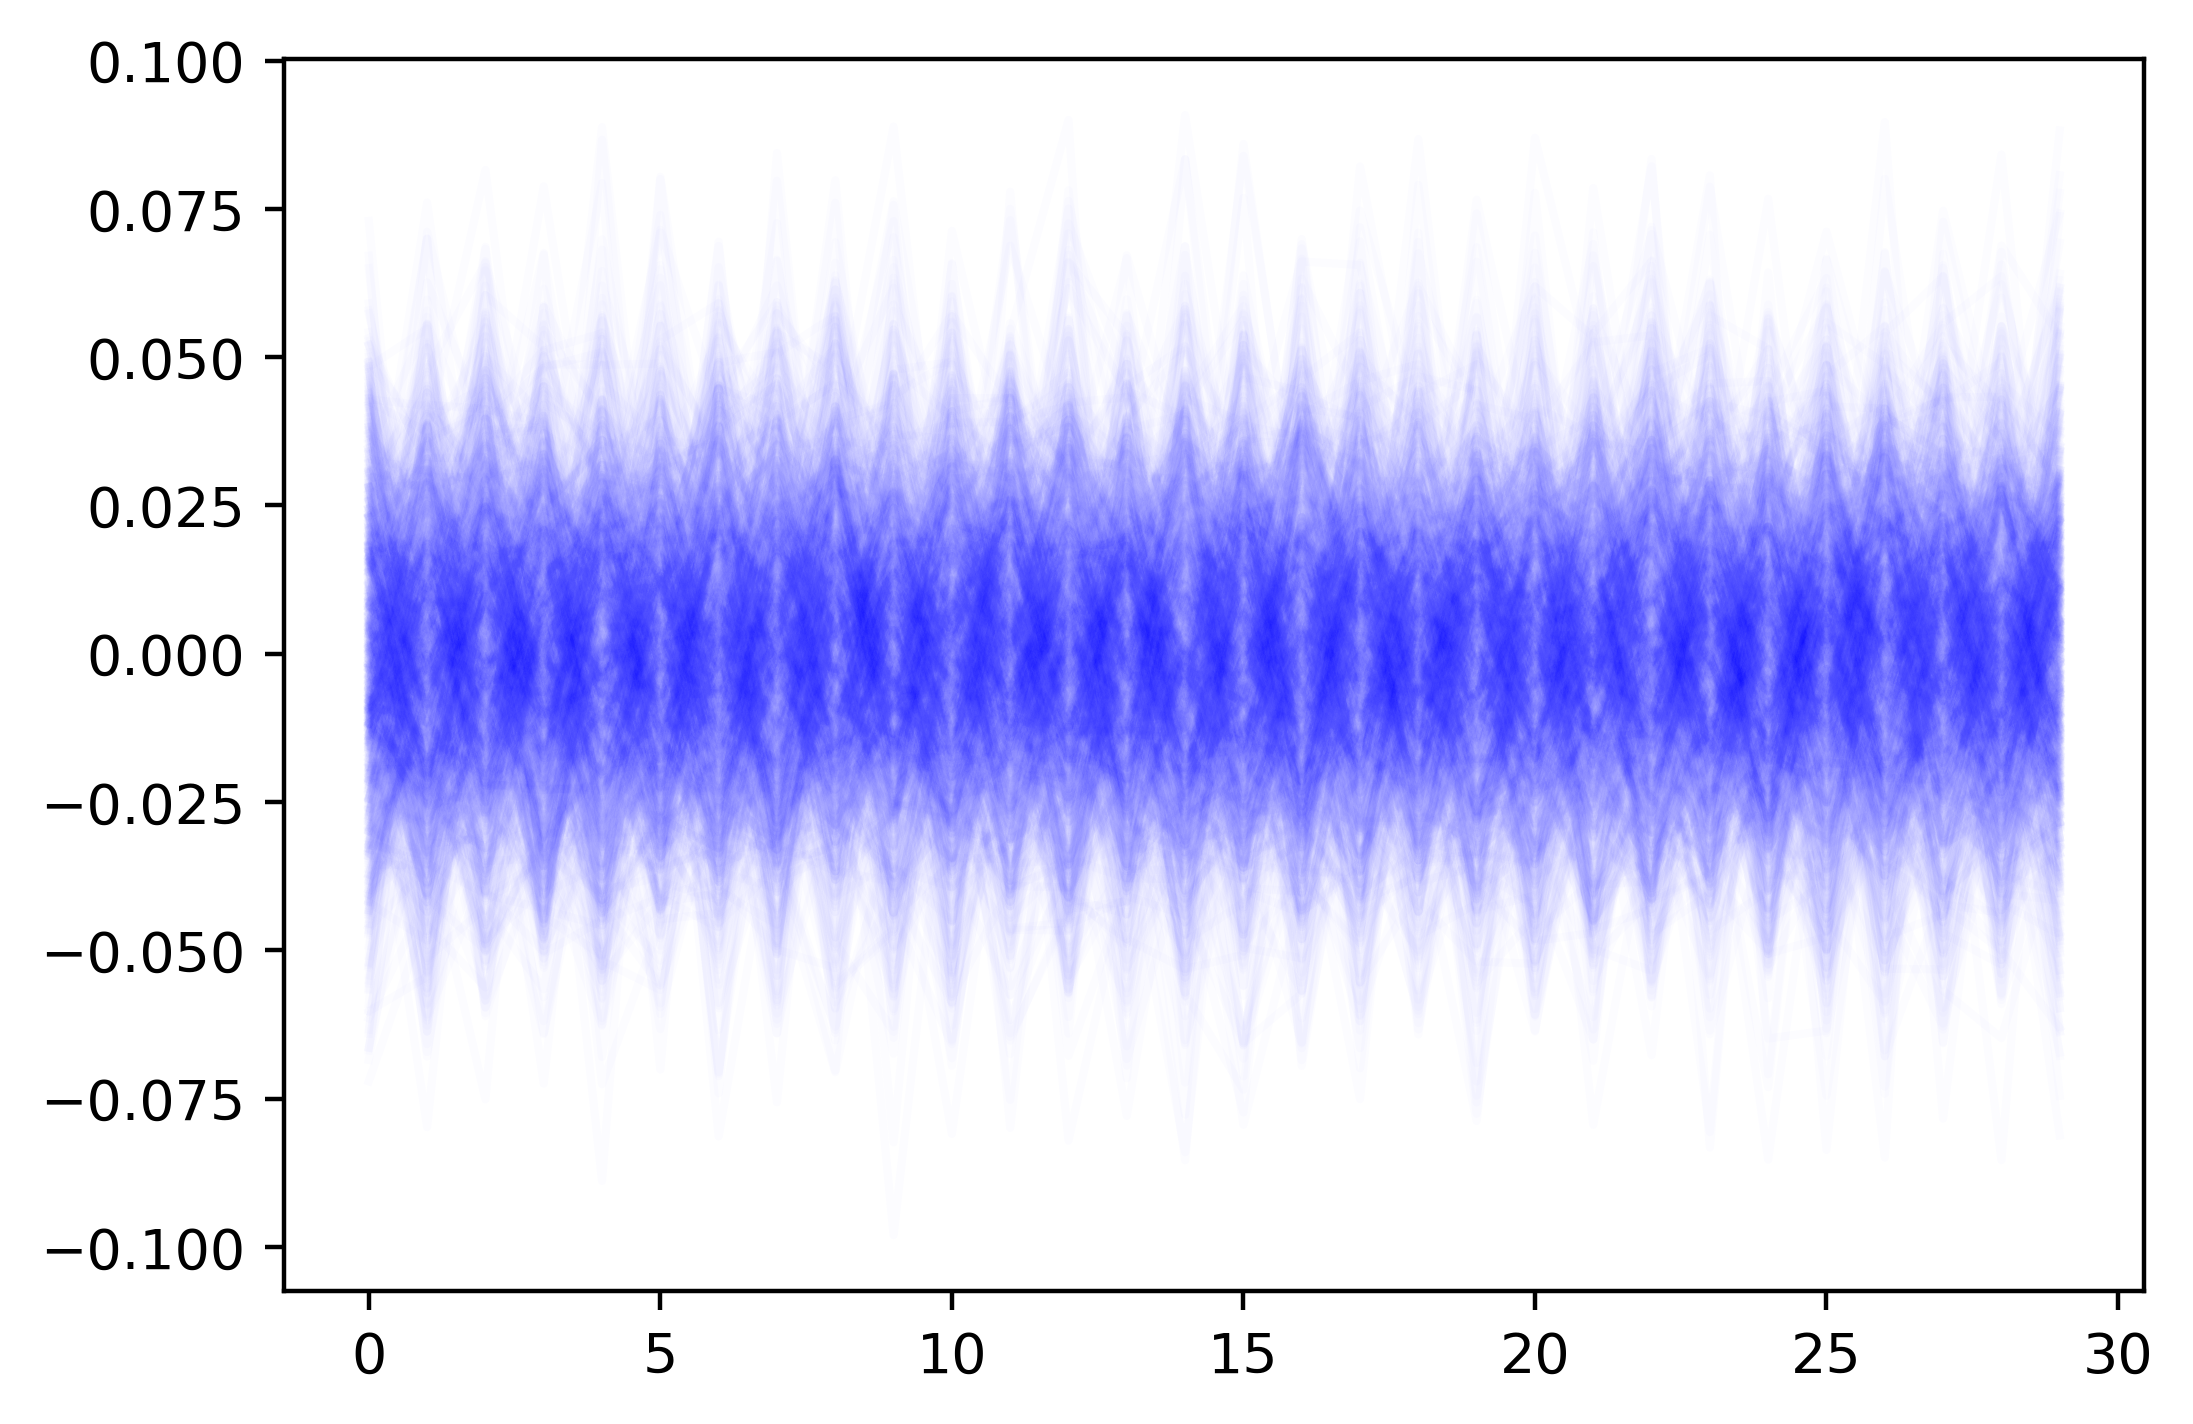

In [31]:
lines = plt.plot(sims.values[-1,:,:].T, color='blue', alpha=0.01)
lines[0].set_label('Simulated paths')
plt.show()

-0.03852463166577383


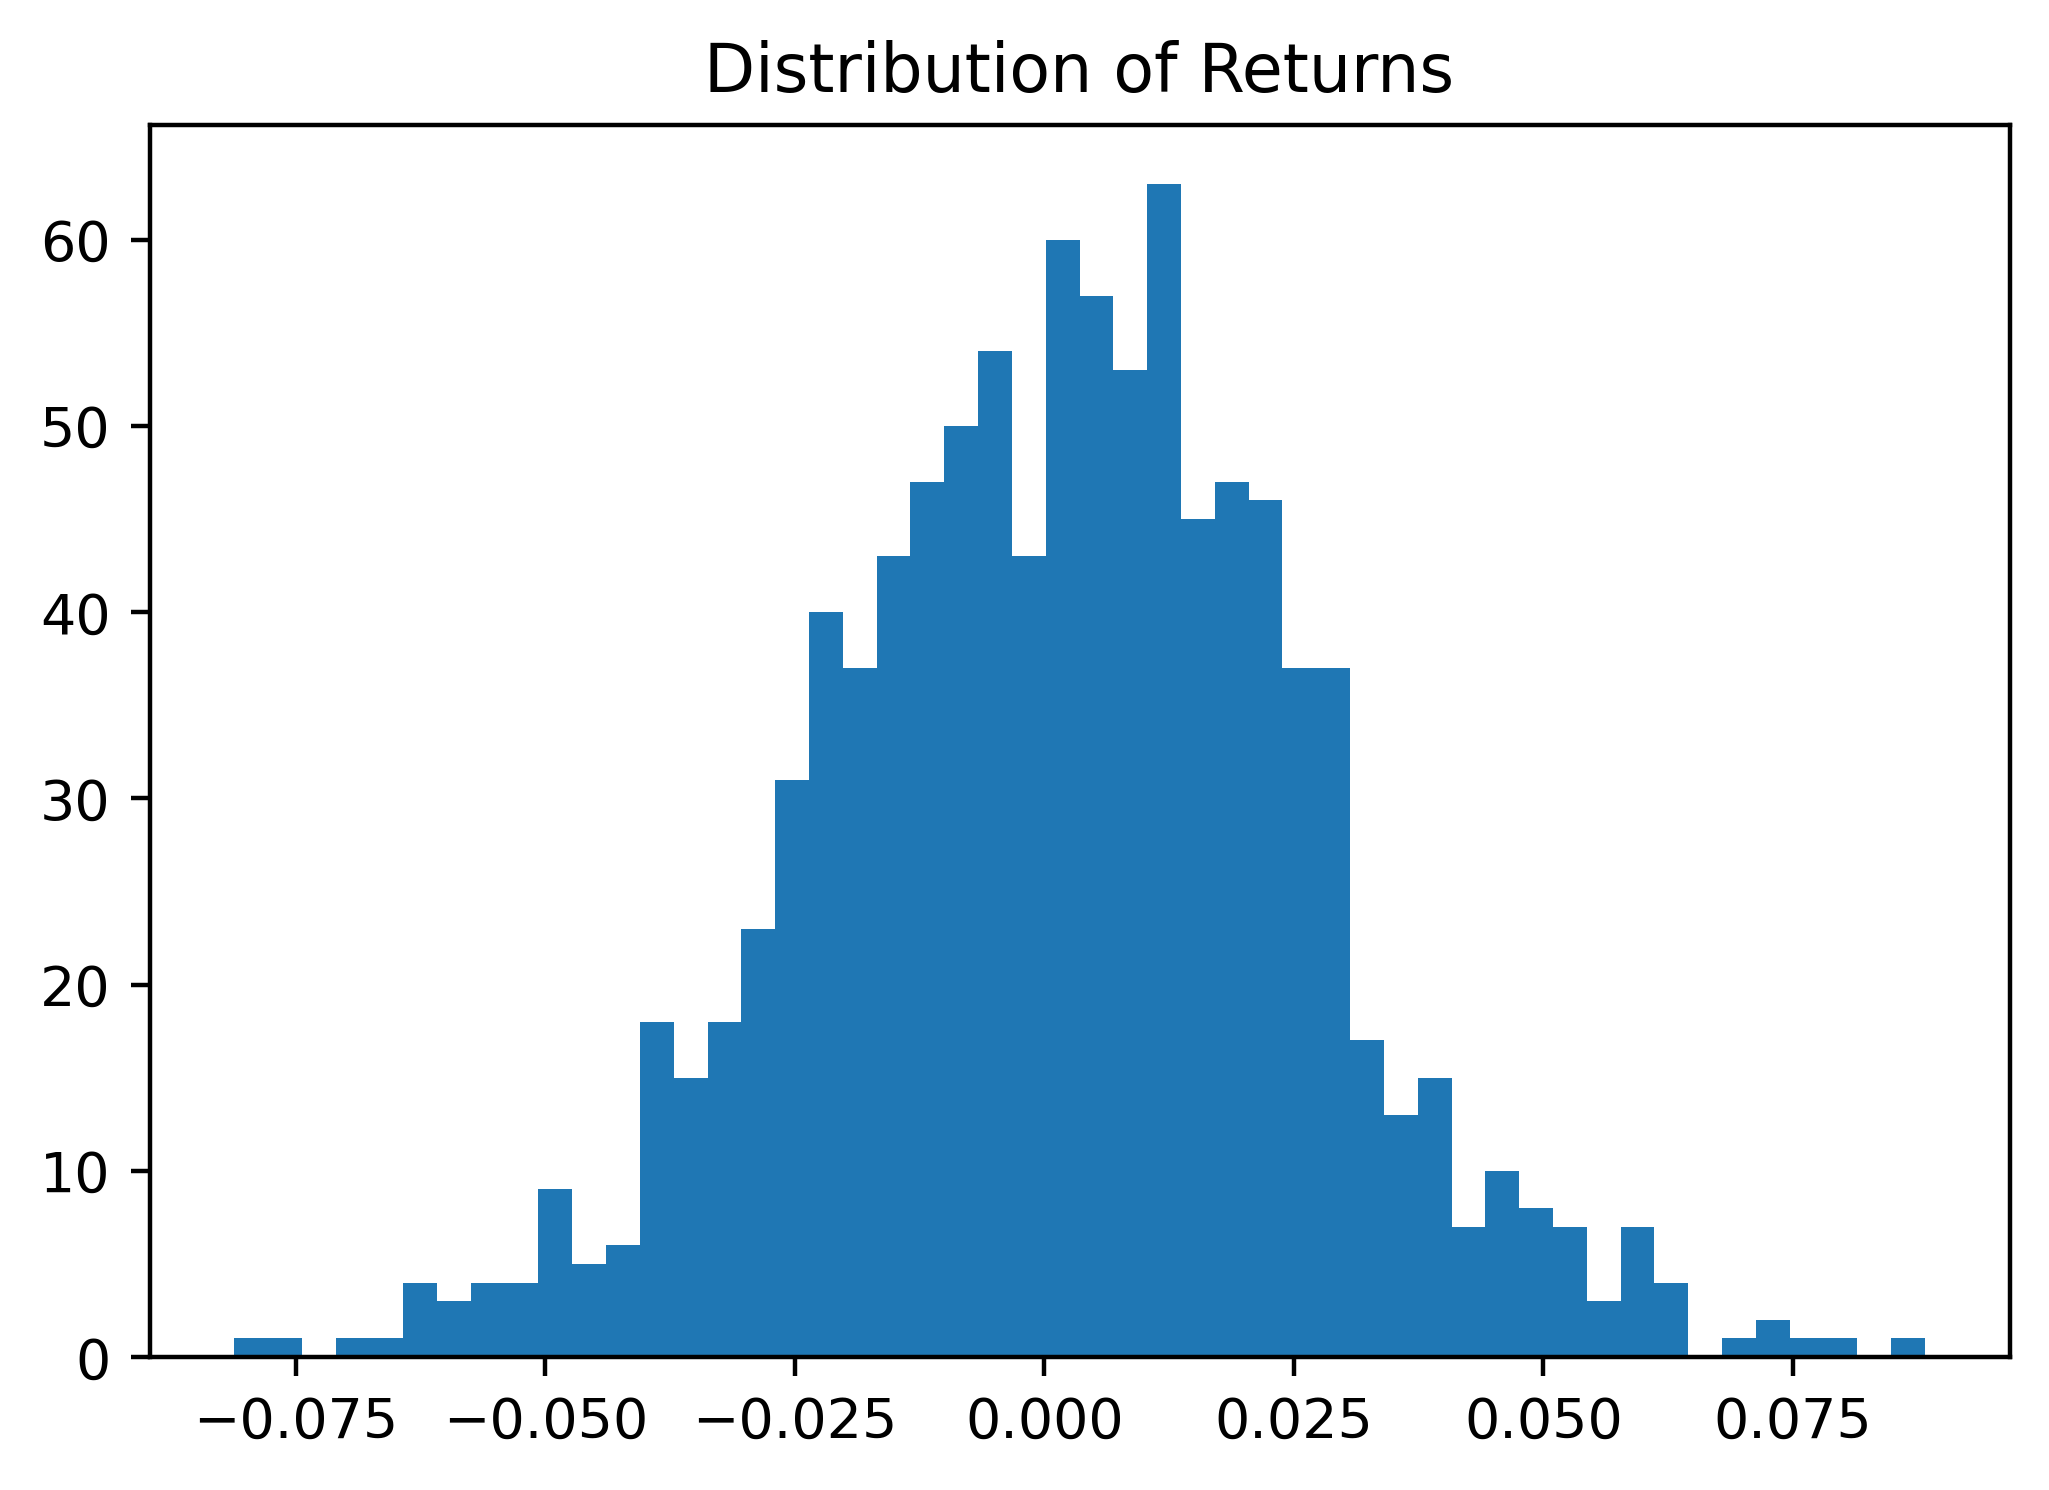

In [32]:
print(np.percentile(sims.values[-1,:,-1].T,5))
plt.hist(sims.values[-1, :,-1],bins=50)
plt.title('Distribution of Returns')
plt.show()
###Нормальное распределение процентного изменения

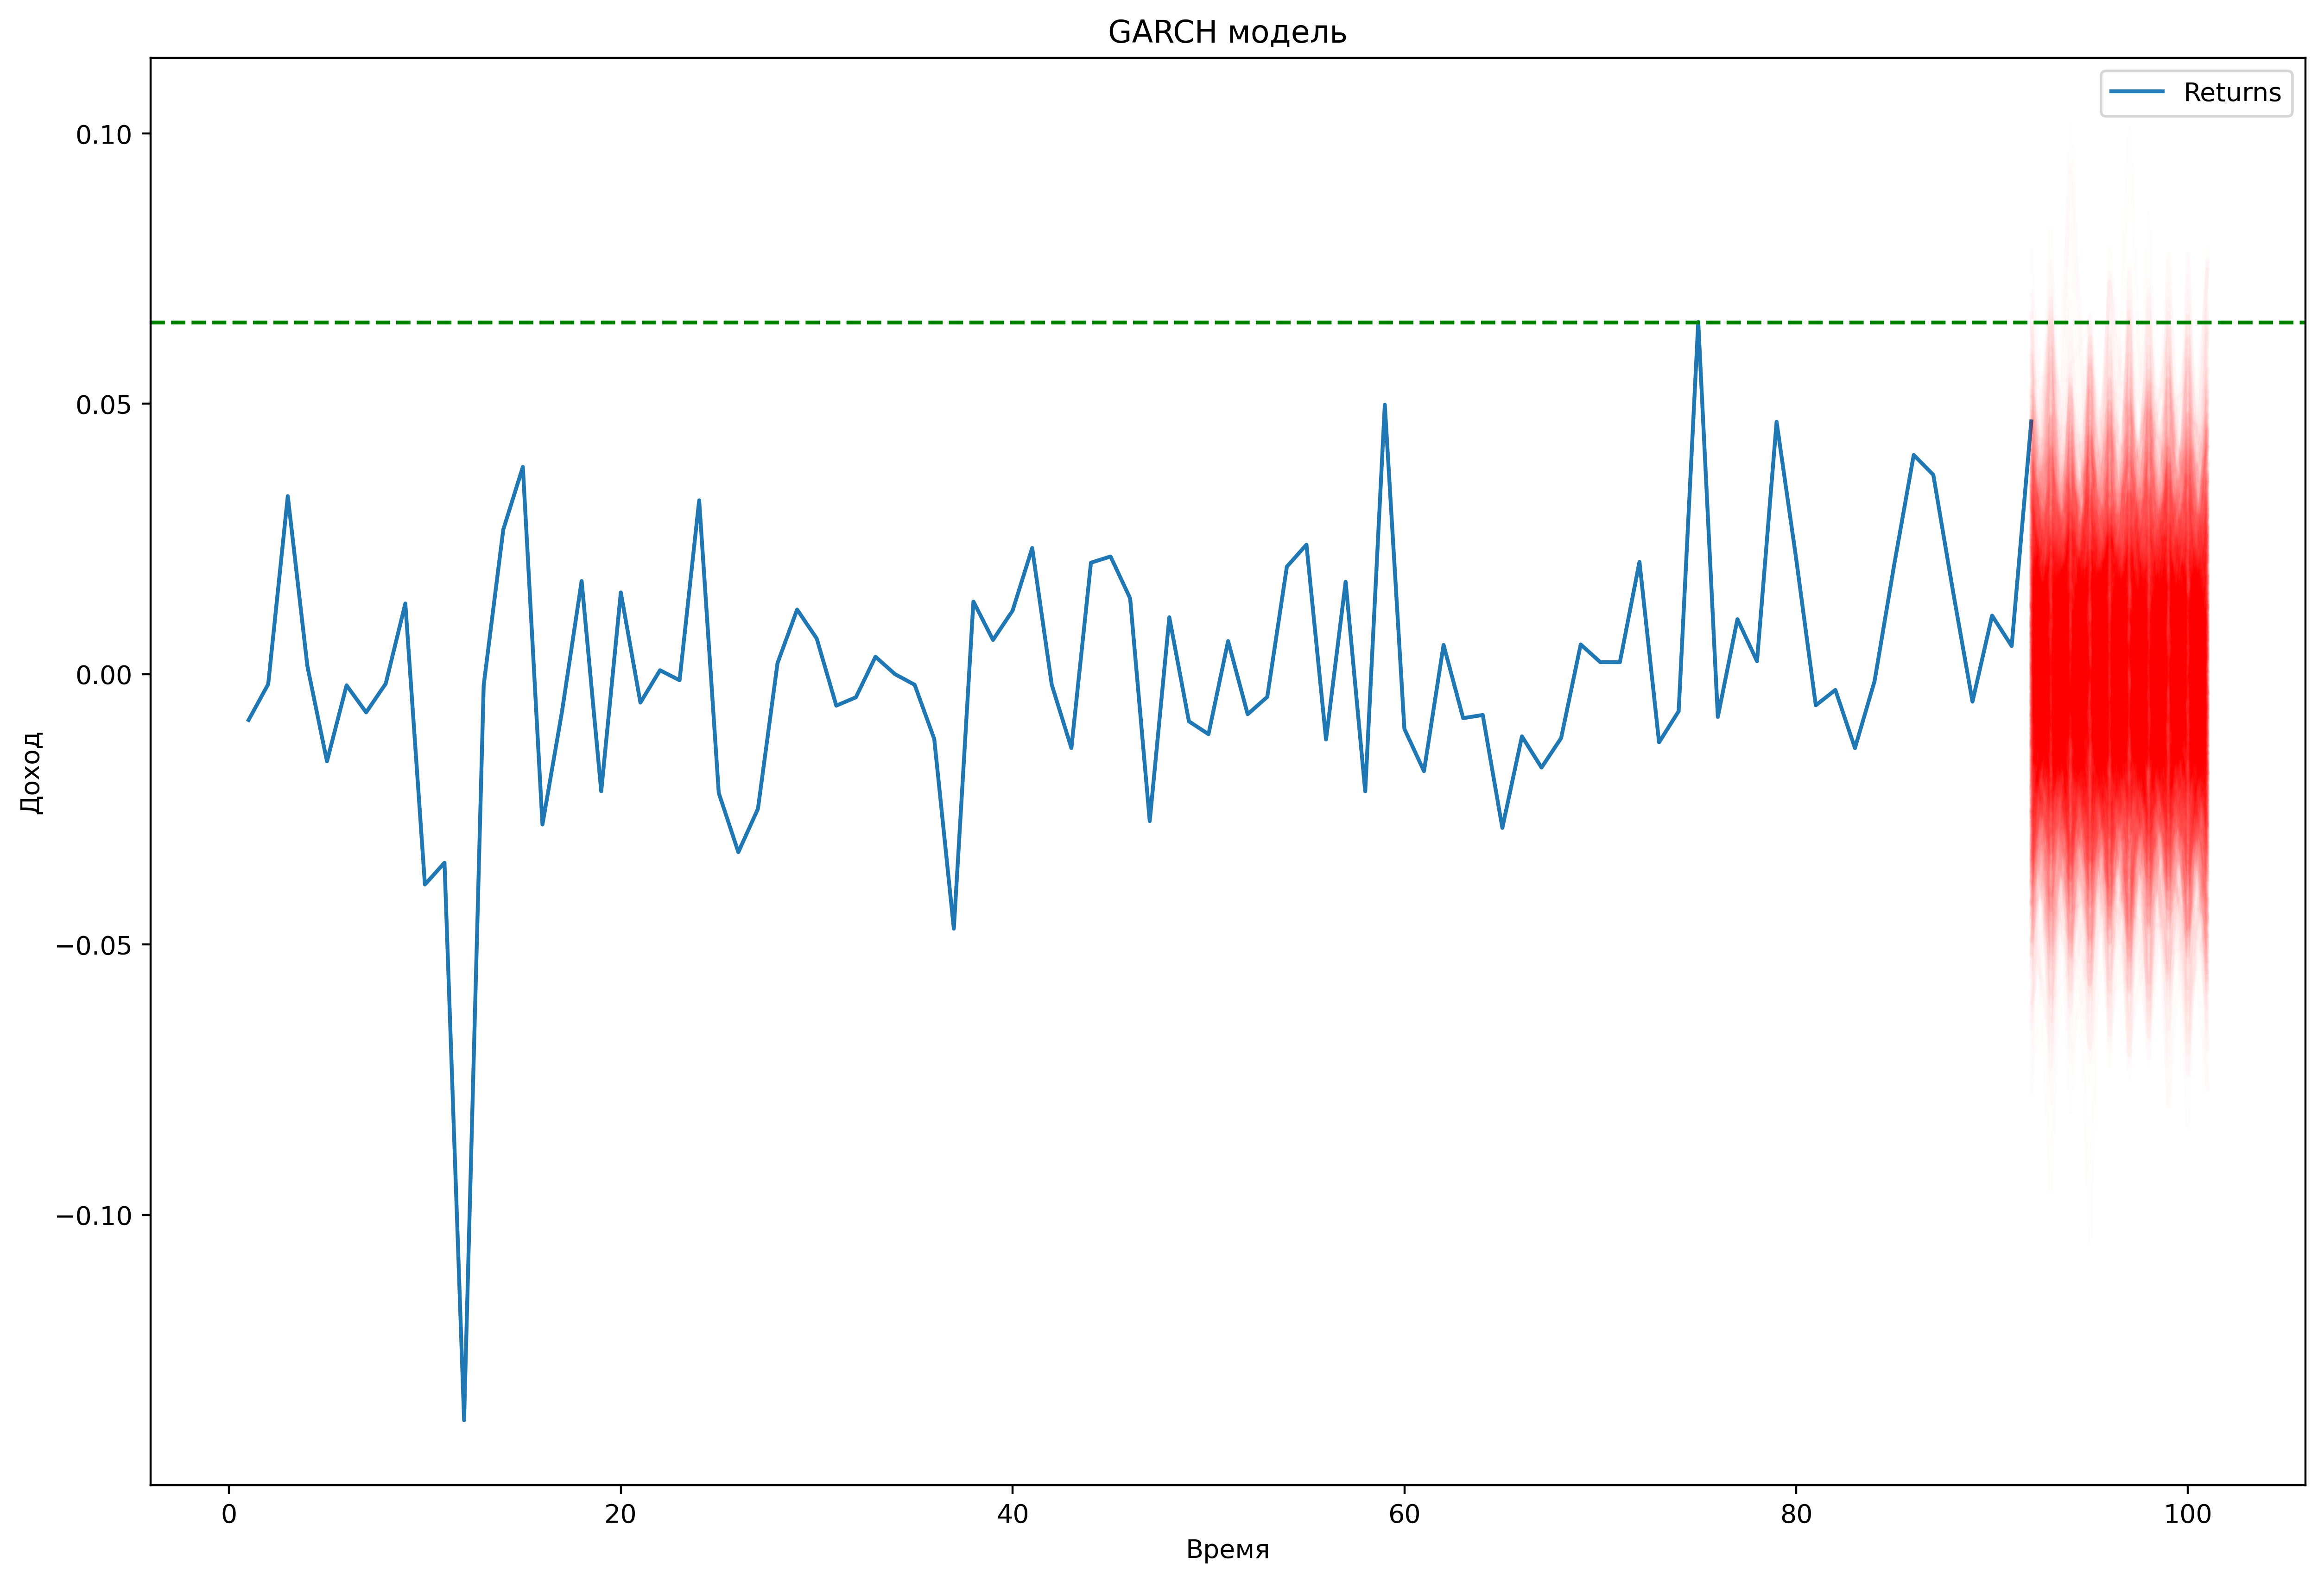

In [38]:
from matplotlib.ticker import MultipleLocator
forecasts = best_garch.forecast(horizon=10, method='simulation', simulations=2000)
sims = forecasts.simulations.values[-1,:,:].T
plt.figure(figsize=(15,10))
plt.plot(returns, label="Returns")
y_value = 0.0  # Уровень, на котором будет нарисована линия
ax.axhline(y=y_value, color='black', linestyle='-')
plt.plot(range(len(returns), len(returns) + len(sims)), sims, color='red', alpha=0.01)
# Установка интервала делений на шкале y 
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(0.05))
y_value_1 = 0.065  # Уровень, на котором будет нарисована линия
ax.axhline(y=y_value_1, color='green', linestyle='--')
plt.title("GARCH модель")
plt.xlabel("Время")
plt.ylabel("Доход")
plt.legend()
plt.show()